# Interlayer Coupling Dependent Bandgap of  $MoS_{2}$ Islands (_working title_)
* Stacking dependent bandgap of $MoS_{2}$ on (highly )HOPG substrates 

# <font color=blue>Fig 2 C area averaged point spectroscopy data analysis on W & S island </font>

## ($MoS_{2}$ islands on HOPG substrates) STS data analysis 
## (Fig 2- c STS on W&S  )
> * file loading : **pd.cvs**
    > * Loading the cvs data file (*.cvs) 
    > * point data collected & averagd with excel in advance 
    
* Authors : Dr. Jewook Park(IBS)
    * *IBS-VdWQS (Inistitute for Basic Science,Center for Van der Waals Quantum Solids), South Korea*
    * email :  jewookpark@ibs.re.kr

> **SPMpy** is a python package for scanning probe microscopy (SPM) data analysis, such as scanning tunneling microscopy and spectroscopy (STM/S) data and atomic force microscopy (AFM) images, which are inherently multidimensional. To analyze SPM data, SPMpy exploits recent image processing(a.k.a. Computer Vision) techniques. SPMpy data analysis functions utilize well-established Python packages, such as Numpy, PANDAS, matplotlib, Seaborn, holoview, etc. In addition, many parts are inspired by well-known SPM data analysis programs, for example, Wsxm(https://aip.scitation.org/doi/10.1063/1.2432410) and Gwyddion(http://gwyddion.net/). Also, SPMpy is trying to apply lessons from 'Fundamentals in Data Visualization'(https://clauswilke.com/dataviz/).

>  **SPMpy** is an open-source project. (Github: https://github.com/Jewook-Park/SPMPY )
> * Contributions, comments, ideas, and error reports are always welcome. Please use the Github page or email jewookpark@ibs.re.kr. Comments & remarks should be in Korean or English. 



# Import modules and functions 

## **1.Preparation** 
* Import necessary packages
    
### loading SPMpy functions
    
* SPMpy_file_loading_funcs.py 
* SPMpy_data_analysis_funcs_sxm.py 


In [2]:
########################################
    #    * Step 1-1
    #    : Import necessary packages 
    #        import modules        
#########################################

import os
import glob
import numpy as np
import pandas as pd
import scipy as sp
from warnings import warn
from scipy import signal

import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import seaborn as sns
import skimage
import seaborn_image as isns

import panel as pn
import panel.widgets as pnw
import ipywidgets as ipw

from scipy.signal import find_peaks

# some packages may be yet to be installed
# please install "seaborn-image" via conda to avoid install error 
# conda install -c conda-forge seaborn-image
try:
     from pptx import Presentation
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named Presentation')
    !pip install python-pptx  
    from pptx import Presentation
    from pptx.util import Inches, Pt

try:
    import nanonispy as nap
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named nanonispy')
    !pip install nanonispy
    import nanonispy as nap



try:
    import xarray as xr
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named xarray')
    
    !pip install xarray 
    import xarray as xr
    
try:
    import xrft
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named xrft')
    !pip install xrft 
    import xrft
    
    
try:
    import holoviews as hv
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named holoviews')
    !pip install holoviews 
    import holoviews as hv
    
try:
    import hvplot.xarray
    import hvplot.pandas 
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named hvplot')
    !pip install hvplot
    import hvplot.xarray
    import hvplot.pandas 

    
    
from SPMpy_file_loading_funcs import *
from SPMpy_2D_data_analysis_funcs import *
from SPMpy_3D_data_analysis_funcs import *



# 2. CSV DATA Import 
    
* check all SPM data files in the given folder 
    * use **FilesInFolder** function
        * input : **file path**
        * return DataFrame columns = ['group','num','filename']



In [7]:
# check the sxm files in the given folder

#target_path = r'C:\IBS CALDES data\IBS Epitaxial vdW Quantum Solid\Papers\Preparation of pyramid and screw MoS2 on HOPG paper\Figure Preparation\Figure 2'
target_path = r'C:\Users\gkp\OneDrive - Oak Ridge National Laboratory\Papers\Preparation of pyramid and screw MoS2 on HOPG paper\Figure Preparation\Figure 2'


# add 'r' to avoid unicodeerror 
#######

file_list_df = files_in_folder(target_path)
csv_file_list_df = file_list_df[file_list_df.type=='csv']
#csv_file_list_df.file_name

STS_234ML = pd.read_csv(csv_file_list_df.file_name.iloc[0])
#grid_file_list_df = file_list_df[file_list_df.type=='3ds']
# file_list_df
#grid_file_groups = list (set(grid_file_list_df['group']))
# file groups
#grid_file_groups

#############################
# 3ds file loading by using Grid2xr
# xr format으로 파일 불러오기 
# (e.g.) # Grid2xr(file_list_df.file_name.iloc[0])
#############################
#spmdata_xr = img2xr(file_list_df.file_name[0])


Current Path =  C:\Users\gkp\OneDrive - Oak Ridge National Laboratory\Papers\Preparation of pyramid and screw MoS2 on HOPG paper\Figure Preparation\Figure 1\2022 0619 Fig1 KPFM dataset
Changed Path =  C:\Users\gkp\OneDrive - Oak Ridge National Laboratory\Papers\Preparation of pyramid and screw MoS2 on HOPG paper\Figure Preparation\Figure 2
                     group  num                      file_name type
0          MoS2_HOPG_78K_0  014         MoS2_HOPG_78K_0014.sxm  sxm
1          MoS2_HOPG_78K_0  033         MoS2_HOPG_78K_0033.sxm  sxm
2          MoS2_HOPG_78K_0  034         MoS2_HOPG_78K_0034.sxm  sxm
3        Grid Spectroscopy  001       Grid Spectroscopy001.3ds  3ds
4        Grid Spectroscopy  002       Grid Spectroscopy002.3ds  3ds
5   Grid Spectroscopy_line  001  Grid Spectroscopy_line001.3ds  3ds
6   Grid Spectroscopy_line  002  Grid Spectroscopy_line002.3ds  3ds
7   Grid Spectroscopy_line  003  Grid Spectroscopy_line003.3ds  3ds
8   Grid Spectroscopy_line  004  Grid Spectros

C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bias_mV'>

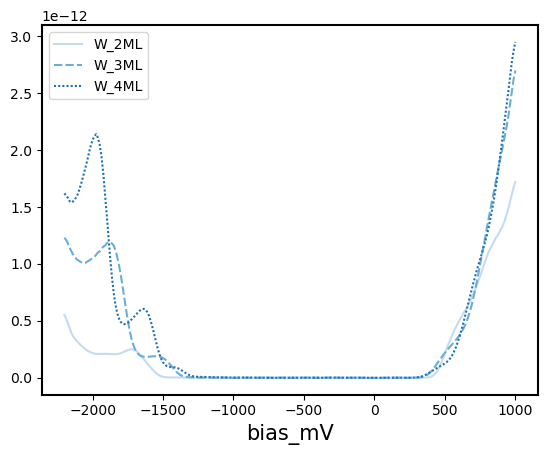

In [9]:
STS_234ML_W = STS_234ML.iloc[:,0:4].set_index('bias_mV')
sns.lineplot(data = STS_234ML_W, palette = "Blues")

C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bias_mV'>

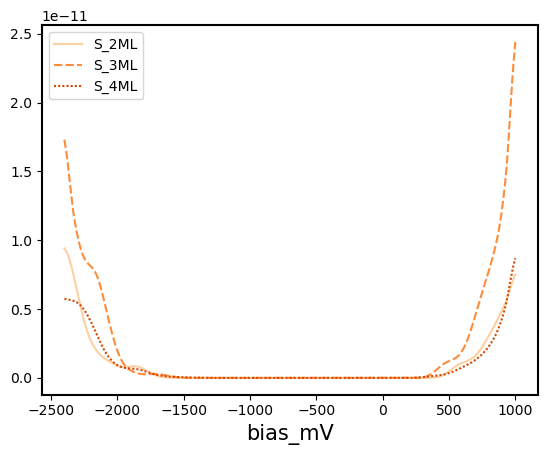

In [11]:
STS_234ML_S = STS_234ML.iloc[:,5:9].rename(columns = {'bias_mV.1':'bias_mV'}).set_index('bias_mV')
sns.lineplot(data = STS_234ML_S, palette = "Oranges")

In [13]:
W_234ML_xr = STS_234ML_W.to_xarray()
S_234ML_xr = STS_234ML_S.to_xarray()

In [15]:
from scipy.signal import savgol_filter

# 1st derivative 
W_234ML_xr_1deriv = W_234ML_xr.differentiate(coord = 'bias_mV')
W_234ML_xr_1deriv_sg = W_234ML_xr_1deriv.copy()

S_234ML_xr_1deriv = S_234ML_xr.differentiate(coord = 'bias_mV')
S_234ML_xr_1deriv_sg = S_234ML_xr_1deriv.copy()


for ch in W_234ML_xr_1deriv:
    W_234ML_xr_1deriv_sg[ch].values =  savgol_filter(W_234ML_xr_1deriv[ch].values,
                                                     window_length = 7,
                                                     polyorder = 3)
    
for ch in S_234ML_xr_1deriv:
    S_234ML_xr_1deriv_sg[ch].values =  savgol_filter(S_234ML_xr_1deriv[ch].values,
                                                     window_length = 7,
                                                     polyorder = 3)

C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

<Axes: xlabel='bias_mV'>

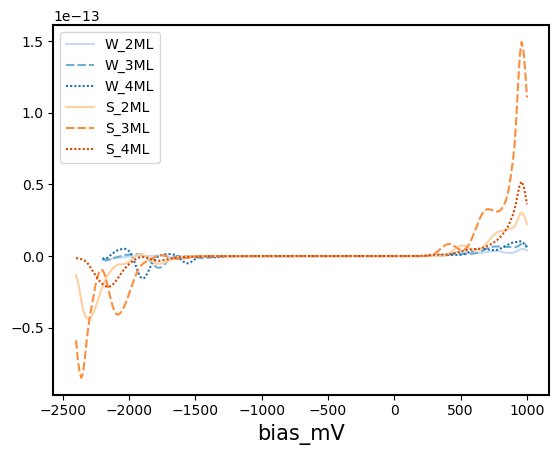

In [17]:
sns.lineplot(data = W_234ML_xr_1deriv_sg.to_dataframe(),palette = "Blues")
sns.lineplot(data = S_234ML_xr_1deriv_sg.to_dataframe(),palette = "Oranges")

In [19]:
# 2nd derivative 

W_234ML_xr_2deriv = W_234ML_xr_1deriv_sg.differentiate(coord = 'bias_mV')
W_234ML_xr_2deriv_sg = W_234ML_xr_2deriv.copy()

S_234ML_xr_2deriv = S_234ML_xr_1deriv_sg.differentiate(coord = 'bias_mV')
S_234ML_xr_2deriv_sg = S_234ML_xr_2deriv.copy()

for ch in W_234ML_xr_2deriv:
    W_234ML_xr_2deriv_sg[ch].values =  savgol_filter(W_234ML_xr_2deriv[ch].values,
                                                     window_length = 7,
                                                     polyorder = 3)

for ch in S_234ML_xr_2deriv:
    S_234ML_xr_2deriv_sg[ch].values =  savgol_filter(S_234ML_xr_2deriv[ch].values,
                                                     window_length = 7,
                                                     polyorder = 3)
    



C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

<Axes: xlabel='bias_mV'>

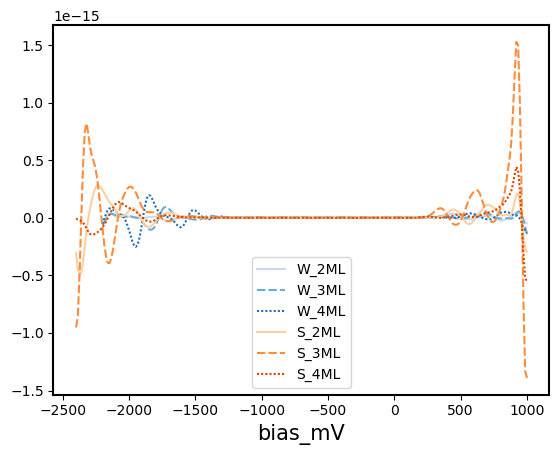

In [21]:
sns.lineplot(data = W_234ML_xr_2deriv_sg.to_dataframe(),palette = "Blues")
sns.lineplot(data = S_234ML_xr_2deriv_sg.to_dataframe(),palette = "Oranges")

In [23]:
# find the 1st derivative peak  to assgin band edge 

for ch in W_234ML_xr_1deriv_sg:
    W_234ML_xr_1deriv_sg[ch+'_pks'] = xr.DataArray(find_peaks(W_234ML_xr_1deriv_sg[ch].values))
    W_234ML_xr_1deriv_sg[ch+'_dps'] = xr.DataArray(find_peaks(-1*W_234ML_xr_1deriv_sg[ch].values))
    # channel 별로 서로다른 number  of peaks  --> 하나로 묶어야함. 
    # 하나로 묶어내고 나서 값을 불러오는 방법은? 
    ############################################
    # W_234ML_xr_2deriv_sg.W_3ML_dps.data.item()[0]
    ############################################
    
for ch in S_234ML_xr_1deriv_sg:
    S_234ML_xr_1deriv_sg[ch+'_pks'] = xr.DataArray(find_peaks(S_234ML_xr_1deriv_sg[ch].values))
    S_234ML_xr_1deriv_sg[ch+'_dps'] = xr.DataArray(find_peaks(-1*S_234ML_xr_1deriv_sg[ch].values))

In [25]:
# find the 2st derivative peak   to assgin peak position in dIdV

for ch in W_234ML_xr_2deriv_sg:
    W_234ML_xr_2deriv_sg[ch+'_pks'] = xr.DataArray(find_peaks(W_234ML_xr_2deriv_sg[ch].values))    
    W_234ML_xr_2deriv_sg[ch+'_dps'] = xr.DataArray(find_peaks(-1*W_234ML_xr_2deriv_sg[ch].values))
    # channel 별로 서로다른 number  of peaks  --> 하나로 묶어야함. 
    # 하나로 묶어내고 나서 값을 불러오는 방법은? 
    ############################################
    # W_234ML_xr_2deriv_sg.W_3ML_dps.data.item()[0]
    ############################################
    
for ch in S_234ML_xr_2deriv_sg:
    S_234ML_xr_2deriv_sg[ch+'_pks'] = xr.DataArray(find_peaks(S_234ML_xr_2deriv_sg[ch].values))
    S_234ML_xr_2deriv_sg[ch+'_dps'] = xr.DataArray(find_peaks(-1*S_234ML_xr_2deriv_sg[ch].values))

In [27]:
#W_234ML_xr_1deriv_sg
# pks N dps
W1_2_pks = W_234ML_xr_1deriv_sg.W_2ML_pks.data.item()[0]
W1_3_pks = W_234ML_xr_1deriv_sg.W_3ML_pks.data.item()[0]
W1_4_pks = W_234ML_xr_1deriv_sg.W_4ML_pks.data.item()[0]
W1_2_dps = W_234ML_xr_1deriv_sg.W_2ML_dps.data.item()[0]
W1_3_dps = W_234ML_xr_1deriv_sg.W_3ML_dps.data.item()[0]
W1_4_dps = W_234ML_xr_1deriv_sg.W_4ML_dps.data.item()[0]

#S_234ML_xr_1deriv_sg
# pks N dps
S1_2_pks = S_234ML_xr_1deriv_sg.S_2ML_pks.data.item()[0]
S1_3_pks = S_234ML_xr_1deriv_sg.S_3ML_pks.data.item()[0]
S1_4_pks = S_234ML_xr_1deriv_sg.S_4ML_pks.data.item()[0]
S1_2_dps = S_234ML_xr_1deriv_sg.S_2ML_dps.data.item()[0]
S1_3_dps = S_234ML_xr_1deriv_sg.S_3ML_dps.data.item()[0]
S1_4_dps = S_234ML_xr_1deriv_sg.S_4ML_dps.data.item()[0]


#W_234ML_xr_2deriv_sg
# pks N dps
W2_2_pks = W_234ML_xr_2deriv_sg.W_2ML_pks.data.item()[0]
W2_3_pks = W_234ML_xr_2deriv_sg.W_3ML_pks.data.item()[0]
W2_4_pks = W_234ML_xr_2deriv_sg.W_4ML_pks.data.item()[0]
W2_2_dps = W_234ML_xr_2deriv_sg.W_2ML_dps.data.item()[0]
W2_3_dps = W_234ML_xr_2deriv_sg.W_3ML_dps.data.item()[0]
W2_4_dps = W_234ML_xr_2deriv_sg.W_4ML_dps.data.item()[0]

#S_234ML_xr_2deriv_sg
# pks N dps
S2_2_pks = S_234ML_xr_2deriv_sg.S_2ML_pks.data.item()[0]
S2_3_pks = S_234ML_xr_2deriv_sg.S_3ML_pks.data.item()[0]
S2_4_pks = S_234ML_xr_2deriv_sg.S_4ML_pks.data.item()[0]
S2_2_dps = S_234ML_xr_2deriv_sg.S_2ML_dps.data.item()[0]
S2_3_dps = S_234ML_xr_2deriv_sg.S_3ML_dps.data.item()[0]
S2_4_dps = S_234ML_xr_2deriv_sg.S_4ML_dps.data.item()[0]


##########
# W&S 2nd derivative dps => W&S peak
# W&S 1st derivative pks&dps => W&S IETS 


In [29]:
# filtering the peaks & dips 
# LDOS at peak position >  resolutin limit 
# set LDOS limit 
LIX_limit= 2E-15
# W type, 1st deriv peaks & dips
W1_2ML_pks = W1_2_pks[(W_234ML_xr.W_2ML[W1_2_pks] > LIX_limit).values]
W1_3ML_pks = W1_3_pks[(W_234ML_xr.W_3ML[W1_3_pks] > LIX_limit).values]
W1_4ML_pks = W1_4_pks[(W_234ML_xr.W_4ML[W1_4_pks] > LIX_limit).values]

W1_2ML_dps = W1_2_dps[(W_234ML_xr.W_2ML[W1_2_dps] > LIX_limit).values]
W1_3ML_dps = W1_3_dps[(W_234ML_xr.W_3ML[W1_3_dps] > LIX_limit).values]
W1_4ML_dps = W1_4_dps[(W_234ML_xr.W_4ML[W1_4_dps] > LIX_limit).values]

# W type, 2nd deriv peaks & dips
W2_2ML_pks = W2_2_pks[(W_234ML_xr.W_2ML[W2_2_pks] > LIX_limit).values]
W2_3ML_pks = W2_3_pks[(W_234ML_xr.W_3ML[W2_3_pks] > LIX_limit).values]
W2_4ML_pks = W2_4_pks[(W_234ML_xr.W_4ML[W2_4_pks] > LIX_limit).values]

W2_2ML_dps = W2_2_dps[(W_234ML_xr.W_2ML[W2_2_dps] > LIX_limit).values]
W2_3ML_dps = W2_3_dps[(W_234ML_xr.W_3ML[W2_3_dps] > LIX_limit).values]
W2_4ML_dps = W2_4_dps[(W_234ML_xr.W_4ML[W2_4_dps] > LIX_limit).values]

# S type, 1st deriv peaks & dips
S1_2ML_pks = S1_2_pks[(S_234ML_xr.S_2ML[S1_2_pks] > LIX_limit).values]
S1_3ML_pks = S1_3_pks[(S_234ML_xr.S_3ML[S1_3_pks] > LIX_limit).values]
S1_4ML_pks = S1_4_pks[(S_234ML_xr.S_4ML[S1_4_pks] > LIX_limit).values]

S1_2ML_dps = S1_2_dps[(S_234ML_xr.S_2ML[S1_2_dps] > LIX_limit).values]
S1_3ML_dps = S1_3_dps[(S_234ML_xr.S_3ML[S1_3_dps] > LIX_limit).values]
S1_4ML_dps = S1_4_dps[(S_234ML_xr.S_4ML[S1_4_dps] > LIX_limit).values]

# S type, 2nd deriv peaks & dips
S2_2ML_pks = S2_2_pks[(S_234ML_xr.S_2ML[S2_2_pks] > LIX_limit).values]
S2_3ML_pks = S2_3_pks[(S_234ML_xr.S_3ML[S2_3_pks] > LIX_limit).values]
S2_4ML_pks = S2_4_pks[(S_234ML_xr.S_4ML[S2_4_pks] > LIX_limit).values]

S2_2ML_dps = S2_2_dps[(S_234ML_xr.S_2ML[S2_2_dps] > LIX_limit).values]
S2_3ML_dps = S2_3_dps[(S_234ML_xr.S_3ML[S2_3_dps] > LIX_limit).values]
S2_4ML_dps = S2_4_dps[(S_234ML_xr.S_4ML[S2_4_dps] > LIX_limit).values]



##########
# W&S 2nd derivative dps => W&S peak
# W&S 1st derivative pks&dps => W&S IETS 


### Find peak positions 
* using 2nd derivative of each curves
* __Local minimums in d2(LDOS)/dV2) = Peaks in LDOS__
* delete the minor peak ( comes from ripples in the gap region)

[ 10  23  40  64 221 241]
[ 23  40 221 241]


C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

Text(0.5, 0.98, 'W2_2ML_peaks')

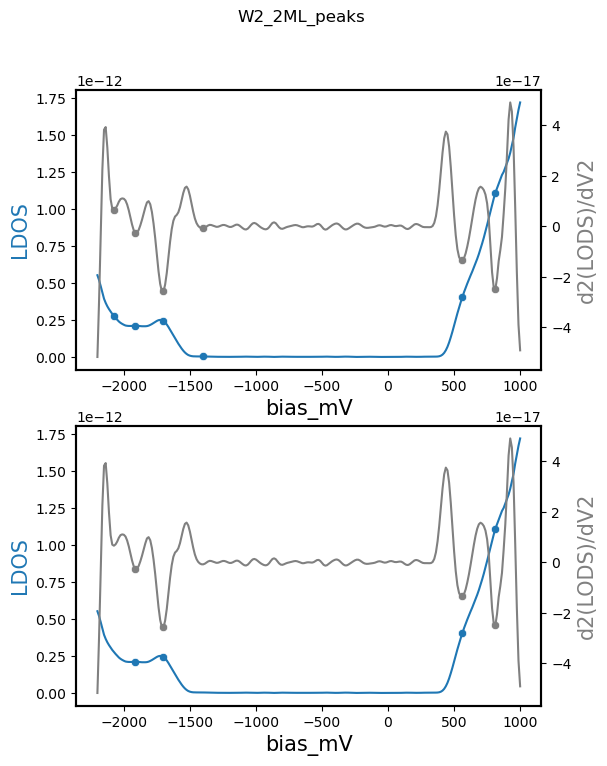

In [32]:
print(W2_2ML_dps)
fig,axes = plt.subplots(2,1, figsize = (6,8))
axs = axes.ravel()

axs0tw = axs[0].twinx()
axs1tw = axs[1].twinx()
# double Y setting 

sns.lineplot(data = W_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'W_2ML',
             ax=axs[0], color  = 'tab:blue')
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_2ML_dps],
                y = W_234ML_xr.W_2ML[W2_2ML_dps],
                ax=axs[0], color  = 'tab:blue')
axs[0].set_ylabel('LDOS', color='tab:blue')

sns.lineplot(data = W_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'W_2ML', 
             ax=axs0tw, color  = 'grey')
sns.scatterplot(x = W_234ML_xr_2deriv_sg.bias_mV[W2_2ML_dps], 
                y = W_234ML_xr_2deriv_sg.W_2ML[W2_2ML_dps],
                ax=axs0tw, color  = 'grey')
axs0tw.set_ylabel('d2(LODS)/dV2', color='grey')


# selected peak points 
W2_2ML_dps_slct = W2_2ML_dps[[1,2,4,5]]
print(W2_2ML_dps_slct)


sns.lineplot(data = W_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'W_2ML',
             ax= axs[1], color  = 'tab:blue')
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_2ML_dps_slct],
                y = W_234ML_xr.W_2ML[W2_2ML_dps_slct],
                ax= axs[1], color  = 'tab:blue')
axs[1].set_ylabel('LDOS', color='tab:blue')

sns.lineplot(data = W_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'W_2ML', 
             ax= axs1tw, color  = 'grey')
sns.scatterplot(x = W_234ML_xr_2deriv_sg.bias_mV[W2_2ML_dps_slct], 
                y = W_234ML_xr_2deriv_sg.W_2ML[W2_2ML_dps_slct],
                ax= axs1tw, color  = 'grey')
axs1tw.set_ylabel('d2(LODS)/dV2', color='grey')

plt.suptitle('W2_2ML_peaks')

[  8  15  29  57  74 216 241 246]
[  8  29  57 216 241]


C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

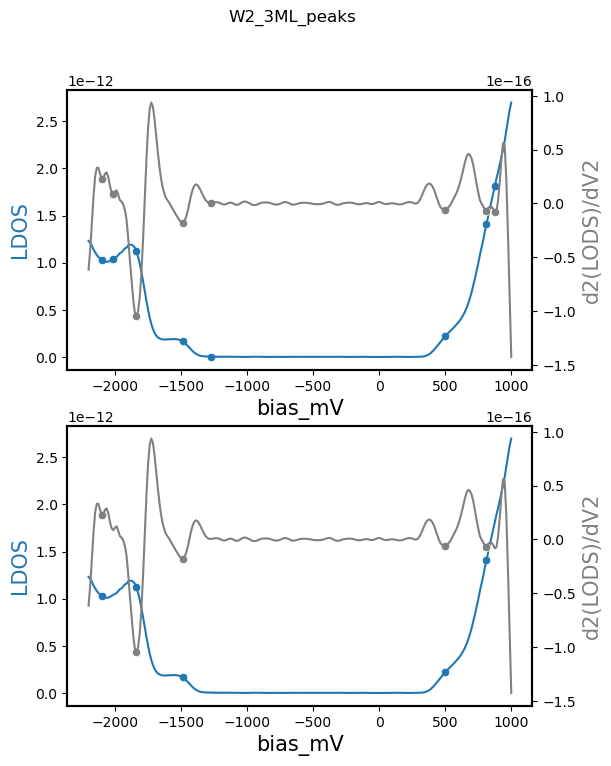

In [33]:
print(W2_3ML_dps)
fig,axes = plt.subplots(2,1, figsize = (6,8))
axs = axes.ravel()

axs0tw = axs[0].twinx()
axs1tw = axs[1].twinx()
# double Y setting 

sns.lineplot(data = W_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'W_3ML',
             ax=axs[0], color  = 'tab:blue')
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_3ML_dps],
                y = W_234ML_xr.W_3ML[W2_3ML_dps],
                ax=axs[0], color  = 'tab:blue')
axs[0].set_ylabel('LDOS', color='tab:blue')

sns.lineplot(data = W_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'W_3ML', 
             ax=axs0tw, color  = 'grey')
sns.scatterplot(x = W_234ML_xr_2deriv_sg.bias_mV[W2_3ML_dps], 
                y = W_234ML_xr_2deriv_sg.W_3ML[W2_3ML_dps],
                ax=axs0tw, color  = 'grey')
axs0tw.set_ylabel('d2(LODS)/dV2', color='grey')


# selected peak points 
W2_3ML_dps_slct = W2_3ML_dps[[0,2,3,5,6]]
print(W2_3ML_dps_slct)


sns.lineplot(data = W_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'W_3ML',
             ax= axs[1], color  = 'tab:blue')
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_3ML_dps_slct],
                y = W_234ML_xr.W_3ML[W2_3ML_dps_slct],
                ax= axs[1], color  = 'tab:blue')
axs[1].set_ylabel('LDOS', color='tab:blue')

sns.lineplot(data = W_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'W_3ML', 
             ax= axs1tw, color  = 'grey')
sns.scatterplot(x = W_234ML_xr_2deriv_sg.bias_mV[W2_3ML_dps_slct], 
                y = W_234ML_xr_2deriv_sg.W_3ML[W2_3ML_dps_slct],
                ax= axs1tw, color  = 'grey')
axs1tw.set_ylabel('d2(LODS)/dV2', color='grey')

plt.suptitle('W2_3ML_peaks')
plt.show()

[ 20  47  64  80  88 211 233]
[ 20  47  64 211 233]


C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

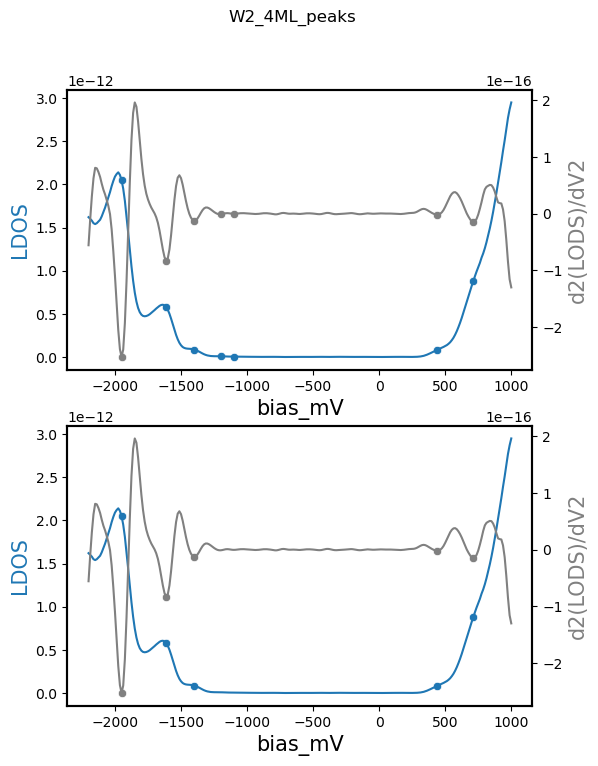

In [34]:
print(W2_4ML_dps)
fig,axes = plt.subplots(2,1, figsize = (6,8))
axs = axes.ravel()

axs0tw = axs[0].twinx()
axs1tw = axs[1].twinx()
# double Y setting 

sns.lineplot(data = W_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'W_4ML',
             ax=axs[0], color  = 'tab:blue')
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_4ML_dps],
                y = W_234ML_xr.W_4ML[W2_4ML_dps],
                ax=axs[0], color  = 'tab:blue')
axs[0].set_ylabel('LDOS', color='tab:blue')

sns.lineplot(data = W_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'W_4ML', 
             ax=axs0tw, color  = 'grey')
sns.scatterplot(x = W_234ML_xr_2deriv_sg.bias_mV[W2_4ML_dps], 
                y = W_234ML_xr_2deriv_sg.W_4ML[W2_4ML_dps],
                ax=axs0tw, color  = 'grey')
axs0tw.set_ylabel('d2(LODS)/dV2', color='grey')


# selected peak points 
W2_4ML_dps_slct = W2_4ML_dps[[0,1,2,5,6]]
print(W2_4ML_dps_slct)


sns.lineplot(data = W_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'W_4ML',
             ax= axs[1], color  = 'tab:blue')
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_4ML_dps_slct],
                y = W_234ML_xr.W_4ML[W2_4ML_dps_slct],
                ax= axs[1], color  = 'tab:blue')
axs[1].set_ylabel('LDOS', color='tab:blue')

sns.lineplot(data = W_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'W_4ML', 
             ax= axs1tw, color  = 'grey')
sns.scatterplot(x = W_234ML_xr_2deriv_sg.bias_mV[W2_4ML_dps_slct], 
                y = W_234ML_xr_2deriv_sg.W_4ML[W2_4ML_dps_slct],
                ax= axs1tw, color  = 'grey')
axs1tw.set_ylabel('d2(LODS)/dV2', color='grey')

plt.suptitle('W2_4ML_peaks')
plt.show()


[  2  26  41  64 223 242 246]
[ 26  41 223 242]


C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

Text(0.5, 0.98, 'S2_2ML_peaks')

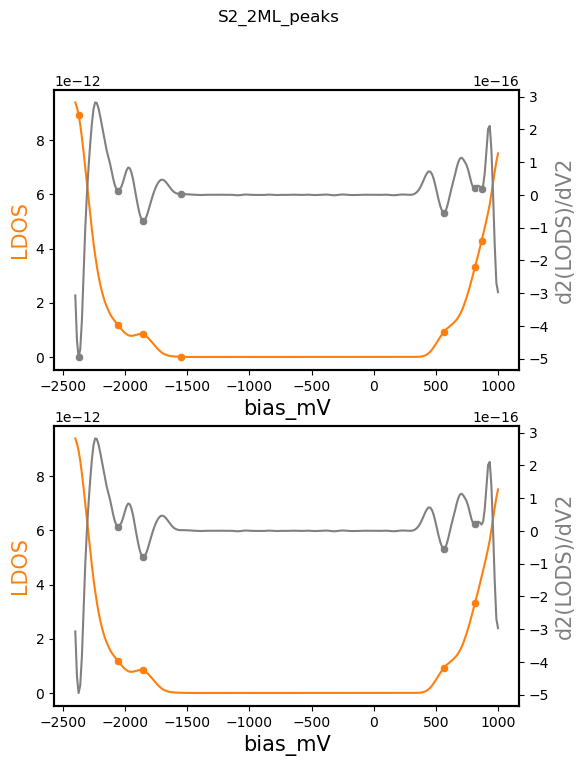

In [36]:
print(S2_2ML_dps)
fig,axes = plt.subplots(2,1, figsize = (6,8))
axs = axes.ravel()

axs0tw = axs[0].twinx()
axs1tw = axs[1].twinx()
# double Y setting 

sns.lineplot(data = S_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'S_2ML',
             ax=axs[0], color  = 'tab:orange')
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_2ML_dps],
                y = S_234ML_xr.S_2ML[S2_2ML_dps],
                ax=axs[0], color  = 'tab:orange')
axs[0].set_ylabel('LDOS', color='tab:orange')

sns.lineplot(data = S_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'S_2ML', 
             ax=axs0tw, color  = 'grey')
sns.scatterplot(x = S_234ML_xr_2deriv_sg.bias_mV[S2_2ML_dps], 
                y = S_234ML_xr_2deriv_sg.S_2ML[S2_2ML_dps],
                ax=axs0tw, color  = 'grey')
axs0tw.set_ylabel('d2(LODS)/dV2', color='grey')


# selected peak points 
S2_2ML_dps_slct = S2_2ML_dps[[1,2,4,5]]
print(S2_2ML_dps_slct)


sns.lineplot(data = S_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'S_2ML',
             ax= axs[1], color  = 'tab:orange')
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_2ML_dps_slct],
                y = S_234ML_xr.S_2ML[S2_2ML_dps_slct],
                ax= axs[1], color  = 'tab:orange')
axs[1].set_ylabel('LDOS', color='tab:orange')

sns.lineplot(data = S_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'S_2ML', 
             ax= axs1tw, color  = 'grey')
sns.scatterplot(x = S_234ML_xr_2deriv_sg.bias_mV[S2_2ML_dps_slct], 
                y = S_234ML_xr_2deriv_sg.S_2ML[S2_2ML_dps_slct],
                ax= axs1tw, color  = 'grey')
axs1tw.set_ylabel('d2(LODS)/dV2', color='grey')

plt.suptitle('S2_2ML_peaks')

[ 19  41  52 216 237]
[ 19  41  52 216 237]


C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

Text(0.5, 0.98, 'S2_3ML_peaks')

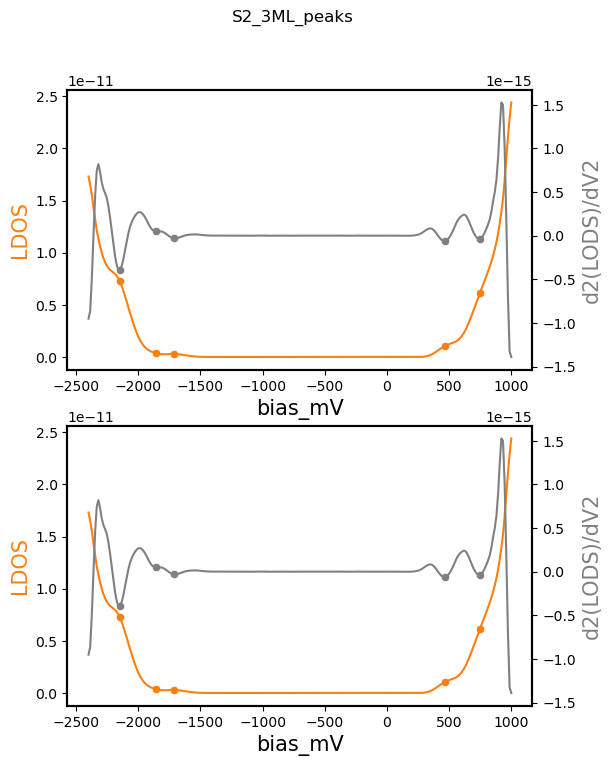

In [37]:
print(S2_3ML_dps)
fig,axes = plt.subplots(2,1, figsize = (6,8))
axs = axes.ravel()

axs0tw = axs[0].twinx()
axs1tw = axs[1].twinx()
# double Y setting 

sns.lineplot(data = S_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'S_3ML',
             ax=axs[0], color  = 'tab:orange')
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_3ML_dps],
                y = S_234ML_xr.S_3ML[S2_3ML_dps],
                ax=axs[0], color  = 'tab:orange')
axs[0].set_ylabel('LDOS', color='tab:orange')

sns.lineplot(data = S_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'S_3ML', 
             ax=axs0tw, color  = 'grey')
sns.scatterplot(x = S_234ML_xr_2deriv_sg.bias_mV[S2_3ML_dps], 
                y = S_234ML_xr_2deriv_sg.S_3ML[S2_3ML_dps],
                ax=axs0tw, color  = 'grey')
axs0tw.set_ylabel('d2(LODS)/dV2', color='grey')


# selected peak points 
S2_3ML_dps_slct = S2_3ML_dps[[0,1,2,3,4]]
print(S2_3ML_dps_slct)


sns.lineplot(data = S_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'S_3ML',
             ax= axs[1], color  = 'tab:orange')
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_3ML_dps_slct],
                y = S_234ML_xr.S_3ML[S2_3ML_dps_slct],
                ax= axs[1], color  = 'tab:orange')
axs[1].set_ylabel('LDOS', color='tab:orange')

sns.lineplot(data = S_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'S_3ML', 
             ax= axs1tw, color  = 'grey')
sns.scatterplot(x = S_234ML_xr_2deriv_sg.bias_mV[S2_3ML_dps_slct], 
                y = S_234ML_xr_2deriv_sg.S_3ML[S2_3ML_dps_slct],
                ax= axs1tw, color  = 'grey')
axs1tw.set_ylabel('d2(LODS)/dV2', color='grey')

plt.suptitle('S2_3ML_peaks')

[  9  42  64  76  83 207 226]
[  9  42  64 207 226]


C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

Text(0.5, 0.98, 'S2_4ML_peaks')

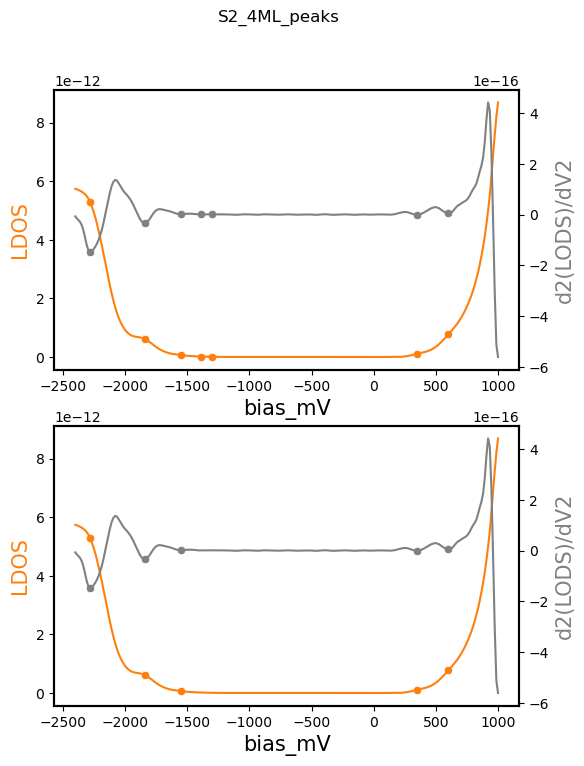

In [38]:
print(S2_4ML_dps)
fig,axes = plt.subplots(2,1, figsize = (6,8))
axs = axes.ravel()

axs0tw = axs[0].twinx()
axs1tw = axs[1].twinx()
# double Y setting 

sns.lineplot(data = S_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'S_4ML',
             ax=axs[0], color  = 'tab:orange')
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_4ML_dps],
                y = S_234ML_xr.S_4ML[S2_4ML_dps],
                ax=axs[0], color  = 'tab:orange')
axs[0].set_ylabel('LDOS', color='tab:orange')

sns.lineplot(data = S_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'S_4ML', 
             ax=axs0tw, color  = 'grey')
sns.scatterplot(x = S_234ML_xr_2deriv_sg.bias_mV[S2_4ML_dps], 
                y = S_234ML_xr_2deriv_sg.S_4ML[S2_4ML_dps],
                ax=axs0tw, color  = 'grey')
axs0tw.set_ylabel('d2(LODS)/dV2', color='grey')



# selected peak points 
S2_4ML_dps_slct = S2_4ML_dps[[0,1,2,5,6]]
print(S2_4ML_dps_slct)


sns.lineplot(data = S_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'S_4ML',
             ax= axs[1], color  = 'tab:orange')
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_4ML_dps_slct],
                y = S_234ML_xr.S_4ML[S2_4ML_dps_slct],
                ax= axs[1], color  = 'tab:orange')
axs[1].set_ylabel('LDOS', color='tab:orange')

sns.lineplot(data = S_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'S_4ML', 
             ax= axs1tw, color  = 'grey')
sns.scatterplot(x = S_234ML_xr_2deriv_sg.bias_mV[S2_4ML_dps_slct], 
                y = S_234ML_xr_2deriv_sg.S_4ML[S2_4ML_dps_slct],
                ax= axs1tw, color  = 'grey')
axs1tw.set_ylabel('d2(LODS)/dV2', color='grey')

plt.suptitle('S2_4ML_peaks')

###  HOPG & 1ML data loading 
* line STS averaged  
* saved with pickle 


In [382]:
Line_HOPG1ML = pd.read_pickle(target_path+"./lineSTS_HOPG_1ML.pkl")


#Line_HOPG1ML[Line_HOPG1ML.layer == '1ML'].groupby('bias_mV').mean()
# group by string colum is error due to mean()
# how to solve?

WS1ML_LIX = Line_HOPG1ML[Line_HOPG1ML.layer == '1ML']['LIX_unit_calc'].groupby('bias_mV').mean()
WS1ML = pd.DataFrame(WS1ML_LIX)
'''
WS1ML_layercount = Line_HOPG1ML[Line_HOPG1ML.layer == '1ML']['layer'].groupby('bias_mV').count()
WS1ML = pd.concat([WS1ML_LIX,WS1ML_layercount], axis =1)
WS1ML'''

"\nWS1ML_layercount = Line_HOPG1ML[Line_HOPG1ML.layer == '1ML']['layer'].groupby('bias_mV').count()\nWS1ML = pd.concat([WS1ML_LIX,WS1ML_layercount], axis =1)\nWS1ML"

<Axes: xlabel='bias_mV'>

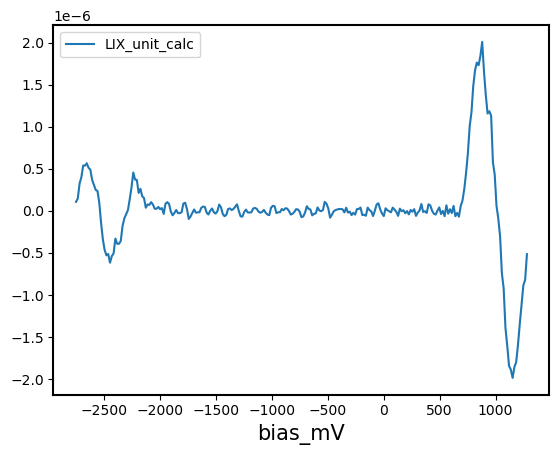

In [384]:
WS1ML_2deriv = WS1ML.diff().diff()

%matplotlib inline
WS1ML_2deriv.rolling(window = 3, center = True).mean().plot()
#plt.show()

In [386]:
WS1ML_dps,_ = sp.signal.find_peaks( -1*WS1ML_2deriv.rolling(window = 3, center = True).mean().values.ravel(), height = 1E-7)
WS1ML_dps

array([ 20,  22,  27, 247], dtype=int64)

In [388]:
WS1ML.iloc[WS1ML_dps].index

Index([-2482.421745080501, -2450.3904967568815, -2370.312375947833,
       1153.1249396502972],
      dtype='float64', name='bias_mV')

C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bias_mV'>

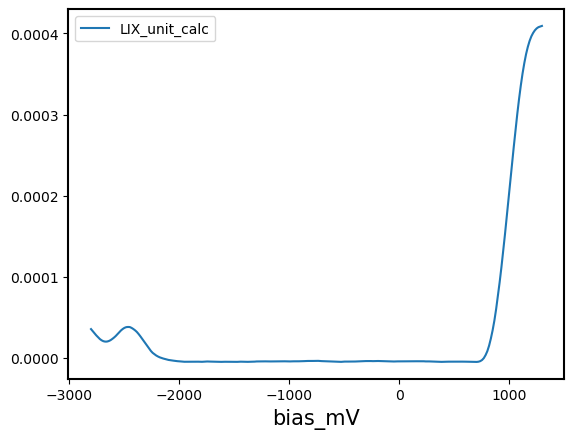

In [390]:
sns.lineplot(data = WS1ML)

In [408]:
WS1ML.iloc[WS1ML_dps]

,LIX_unit_calc
bias_mV,
-2482.421745,0.000038
-2450.390497,0.000038
-2370.312376,0.000029
1153.124940,0.000375


In [406]:
WS1ML[WS1ML_dps]

KeyError: "None of [Index([20, 22, 27, 247], dtype='int64')] are in the [columns]"

C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


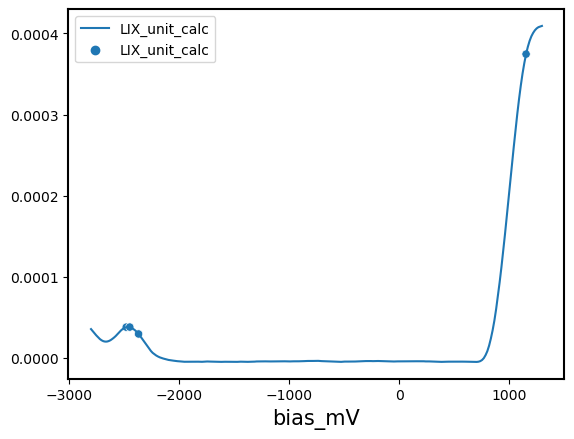

In [412]:
sns.lineplot(data = WS1ML, color  = 'tab:gray')
sns.scatterplot(WS1ML.iloc[WS1ML_dps],
                 color  = 'tab:gray')
plt.show()

C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

[  9  42  64 207 226]


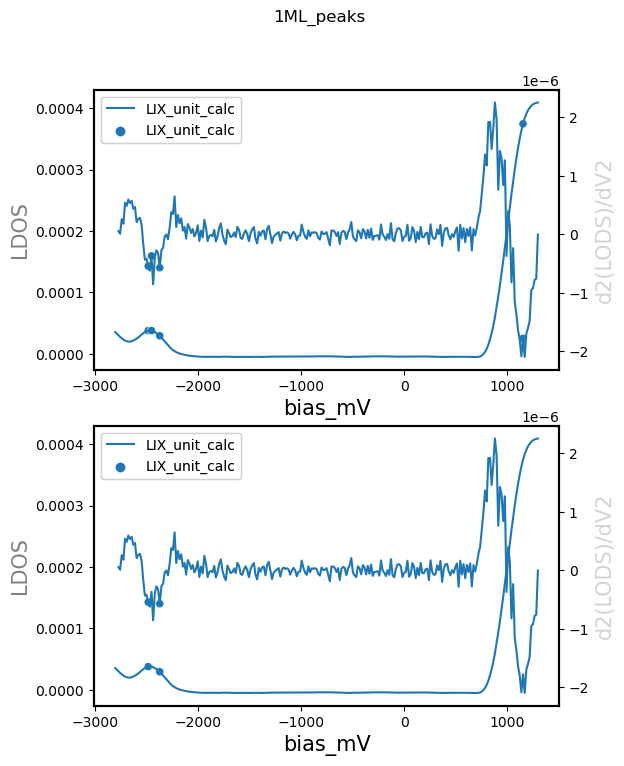

In [420]:
fig,axes = plt.subplots(2,1, figsize = (6,8))
axs = axes.ravel()

axs0tw = axs[0].twinx()
axs1tw = axs[1].twinx()
# double Y setting 

sns.lineplot(data = WS1ML,
             ax=axs[0], color  = 'tab:gray')
sns.scatterplot(WS1ML.iloc[WS1ML_dps],
                ax=axs[0], color  = 'tab:gray')
axs[0].set_ylabel('LDOS', color='tab:gray')

sns.lineplot(data = WS1ML_2deriv,
             ax=axs0tw, color  = 'lightgray')
sns.scatterplot(WS1ML_2deriv.iloc[WS1ML_dps],
                ax=axs0tw, color  = 'lightgray')
axs0tw.set_ylabel('d2(LODS)/dV2', color='lightgray')

WS1ML_dps_slct = WS1ML_dps[[0,2]]
print(S2_4ML_dps_slct)


sns.lineplot(data = WS1ML,
             ax=axs[1], color  = 'tab:gray')
sns.scatterplot(WS1ML.iloc[WS1ML_dps_slct],
                ax=axs[1], color  = 'tab:gray')
axs[1].set_ylabel('LDOS', color='tab:gray')

sns.lineplot(data = WS1ML_2deriv,
             ax=axs1tw, color  = 'lightgray')
sns.scatterplot(WS1ML_2deriv.iloc[WS1ML_dps_slct],
                ax=axs1tw, color  = 'lightgray')
axs1tw.set_ylabel('d2(LODS)/dV2', color='lightgray')

plt.suptitle('1ML_peaks')
plt.show()

#### HOPG & 1ML case 

In [ ]:
sns.set_style("whitegrid")
fig,axs = plt.subplots( figsize = (4,3))

axs0tw = axs.twinx()
W1ML_l = sns.lineplot(data = WS1ML,
             ax=axs, palette  = 'OrRd_r')
sns.scatterplot(WS1ML.iloc[WS1ML_dps_slct].index ,
                WS1ML.iloc[WS1ML_dps_slct].LIX_unit_calc,
                ax=axs, color  = 'salmon')
axs.set_ylabel('LDOS', color='salmon')

W1ML_l_2der= sns.lineplot(data = WS1ML_2deriv,
                          ax=axs0tw, palette  = 'Greys')

sns.scatterplot(WS1ML_2deriv.iloc[WS1ML_dps_slct].index ,
                WS1ML_2deriv.iloc[WS1ML_dps_slct].LIX_unit_calc,
                ax=axs0tw, color  = 'black')
axs0tw.set_ylabel('d2(LODS)/dV2', color='black')
W1ML_l.legend(labels = ['1ML'])
plt.suptitle('1ML_peaks')
plt.savefig('1ML_peaks.svg')
plt.show()

### Plot all (2,3,4) curves together 
* with a offset 

In [ ]:
# W stacks 

fig,axes = plt.subplots(2,1, figsize = (6,8))
axs = axes.ravel()

offset_3ML = 1E-12
offset_4ML = 2E-12

sns.lineplot(data = W_234ML_xr.to_dataframe(), 
             x =  'bias_mV', y = 'W_2ML', 
             ax= axs[0], color  = 'tab:blue')
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_2ML_dps_slct], 
                y = W_234ML_xr.W_2ML[W2_2ML_dps_slct],
                ax= axs[0], color  = 'tab:blue')

sns.lineplot(data = W_234ML_xr.to_dataframe()+offset_3ML, 
             x =  'bias_mV', y = 'W_3ML', 
             ax= axs[0], color  = 'tab:blue')
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_3ML_dps_slct], 
                y = W_234ML_xr.W_3ML[W2_3ML_dps_slct]+offset_3ML,
                ax= axs[0], color  = 'tab:blue')

sns.lineplot(data = W_234ML_xr.to_dataframe()+offset_4ML,
             x =  'bias_mV', y = 'W_4ML',
             ax= axs[0], color  = 'tab:blue')
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_4ML_dps_slct],
                y = W_234ML_xr.W_4ML[W2_4ML_dps_slct]+offset_4ML,
                ax= axs[0], color  = 'tab:blue')
axs[0].set_ylabel('dI/dV (nA/V)', color='tab:blue')


# S_234

sns.lineplot(data = S_234ML_xr.to_dataframe(), 
             x =  'bias_mV', y = 'S_2ML', 
             ax= axs[1], color  = 'tab:orange')
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_2ML_dps_slct], 
                y = S_234ML_xr.S_2ML[S2_2ML_dps_slct],
                ax= axs[1], color  = 'tab:orange')

sns.lineplot(data = S_234ML_xr.to_dataframe()+offset_3ML, 
             x =  'bias_mV', y = 'S_3ML', 
             ax= axs[1], color  = 'tab:orange')
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_3ML_dps_slct], 
                y = S_234ML_xr.S_3ML[S2_3ML_dps_slct]+offset_3ML,
                ax= axs[1], color  = 'tab:orange')

sns.lineplot(data = S_234ML_xr.to_dataframe()+offset_4ML,
             x =  'bias_mV', y = 'S_4ML',
             ax= axs[1], color  = 'tab:orange')
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_4ML_dps_slct],
                y = S_234ML_xr.S_4ML[S2_4ML_dps_slct]+offset_4ML,
                ax= axs[1], color  = 'tab:orange')
axs[1].set_ylabel('dI/dV (nA/V)', color='tab:orange')



plt.show()

### Plot all (2,3,4) curves + Peak positions W+S

In [ ]:
# W stacks 

fig,axs = plt.subplots(figsize = (6,4))

offset_3ML = 3E-12
offset_4ML = 6E-12

sns.lineplot(data = W_234ML_xr.to_dataframe(), 
             x =  'bias_mV', y = 'W_2ML', 
             color  = 'tab:blue',ls ='solid',
             ax= axs)
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_2ML_dps_slct], 
                y = W_234ML_xr.W_2ML[W2_2ML_dps_slct],
                color  = 'tab:blue',
                ax= axs)

sns.lineplot(data = W_234ML_xr.to_dataframe()+offset_3ML, 
             x =  'bias_mV', y = 'W_3ML', 
             color  = 'tab:blue',ls ='dashed',
             ax= axs)
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_3ML_dps_slct], 
                y = W_234ML_xr.W_3ML[W2_3ML_dps_slct]+offset_3ML,
                color  = 'tab:blue',
                ax= axs)
                
sns.lineplot(data = W_234ML_xr.to_dataframe()+offset_4ML,
             x =  'bias_mV', y = 'W_4ML',
             color  = 'tab:blue', ls ='dotted',
             ax= axs)
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_4ML_dps_slct],
                y = W_234ML_xr.W_4ML[W2_4ML_dps_slct]+offset_4ML,
                color  = 'tab:blue',
                ax= axs)
axs.set_ylabel('dI/dV (nA/V)', color='tab:blue')


# S_234

sns.lineplot(data = S_234ML_xr.to_dataframe(), 
             x =  'bias_mV', y = 'S_2ML',
             color  = 'tab:orange',ls ='solid',
             ax= axs)
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_2ML_dps_slct], 
                y = S_234ML_xr.S_2ML[S2_2ML_dps_slct],
                color  = 'tab:orange',
                ax= axs)

sns.lineplot(data = S_234ML_xr.to_dataframe()+offset_3ML, 
             x =  'bias_mV', y = 'S_3ML',
             color  = 'tab:orange',ls ='dashed',
             ax= axs)
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_3ML_dps_slct], 
                y = S_234ML_xr.S_3ML[S2_3ML_dps_slct]+offset_3ML,
                color  = 'tab:orange',
                ax= axs)

sns.lineplot(data = S_234ML_xr.to_dataframe()+offset_4ML,
             x =  'bias_mV', y = 'S_4ML',
             color  = 'tab:blue', ls ='dotted',
             ax = axs)
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_4ML_dps_slct],
                y = S_234ML_xr.S_4ML[S2_4ML_dps_slct]+offset_4ML,
                color  = 'tab:orange',
                ax= axs)
#axs.legend()
plt.savefig('W_S_LDOS_Peaks.svg')
plt.show()

### Grid (W&S + 2,3,4) of LDOS + d$^2$(LDOS)/dV$^2$

In [ ]:
fig,axes = plt.subplots(2,3, figsize = (10,8))
axs = axes.ravel()

axs0tw = axs[0].twinx()
axs1tw = axs[1].twinx()
axs2tw = axs[2].twinx()
#W234
axs3tw = axs[3].twinx()
axs4tw = axs[4].twinx()
axs5tw = axs[5].twinx()
#S234
# double Y setting 

#W2ML
sns.lineplot(data = W_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'W_2ML',
             ax= axs[0], color  = 'tab:blue')
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_2ML_dps_slct],
                y = W_234ML_xr.W_2ML[W2_2ML_dps_slct],
                ax= axs[0], color  = 'tab:blue')
axs[0].set_xlabel('Bias (mV)', color='k', fontsize = 'large')
axs[0].set_ylabel('LDOS', color='tab:blue', fontsize = 'large')

sns.lineplot(data = W_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'W_2ML', 
             ax= axs0tw, color  = 'grey')
sns.scatterplot(x = W_234ML_xr_2deriv_sg.bias_mV[W2_2ML_dps_slct], 
                y = W_234ML_xr_2deriv_sg.W_2ML[W2_2ML_dps_slct],
                ax= axs0tw, color  = 'grey')
axs0tw.set_ylabel('d$^2$(LODS)/dV$^2$', color='grey', fontsize = 'large')
plt.tight_layout()
axs[0].set_title('W_2ML_peaks', y= 1.1)


#W3ML
sns.lineplot(data = W_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'W_3ML',
             ax= axs[1], color  = 'tab:blue')
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_3ML_dps_slct],
                y = W_234ML_xr.W_3ML[W2_3ML_dps_slct],
                ax= axs[1], color  = 'tab:blue')
axs[1].set_xlabel('Bias (mV)', color='k', fontsize = 'large')
axs[1].set_ylabel('LDOS', color='tab:blue', fontsize = 'large')

sns.lineplot(data = W_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'W_3ML', 
             ax= axs1tw, color  = 'grey')
sns.scatterplot(x = W_234ML_xr_2deriv_sg.bias_mV[W2_3ML_dps_slct], 
                y = W_234ML_xr_2deriv_sg.W_3ML[W2_3ML_dps_slct],
                ax= axs1tw, color  = 'grey')
axs1tw.set_ylabel('d$^2$(LDOS)/dV$^2$', color='grey', fontsize = 'large')
axs[1].set_title('W_3ML_peaks', y= 1.1)

#W4ML
sns.lineplot(data = W_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'W_4ML',
             ax= axs[2], color  = 'tab:blue')
sns.scatterplot(x =  W_234ML_xr.bias_mV[W2_4ML_dps_slct],
                y = W_234ML_xr.W_4ML[W2_4ML_dps_slct],
                ax= axs[2], color  = 'tab:blue')
axs[2].set_xlabel('Bias (mV)', color='k', fontsize = 'large')
axs[2].set_ylabel('LDOS', color='tab:blue', fontsize = 'large')

sns.lineplot(data = W_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'W_4ML', 
             ax= axs2tw, color  = 'grey')
sns.scatterplot(x = W_234ML_xr_2deriv_sg.bias_mV[W2_4ML_dps_slct], 
                y = W_234ML_xr_2deriv_sg.W_4ML[W2_4ML_dps_slct],
                ax= axs2tw, color  = 'grey')
axs2tw.set_ylabel('d$^2$(LDOS)/dV$^2$', color='grey', fontsize = 'large')

axs[2].set_title('W_4ML_peaks', y= 1.1)


#S2ML

sns.lineplot(data = S_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'S_2ML',
             ax= axs[3], color  = 'tab:orange')
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_2ML_dps_slct],
                y = S_234ML_xr.S_2ML[S2_2ML_dps_slct],
                ax= axs[3], color  = 'tab:orange')
axs[3].set_xlabel('Bias (mV)', color='k', fontsize = 'large')
axs[3].set_ylabel('LDOS', color='tab:orange', fontsize = 'large')

sns.lineplot(data = S_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'S_2ML', 
             ax= axs3tw, color  = 'grey')
sns.scatterplot(x = S_234ML_xr_2deriv_sg.bias_mV[S2_2ML_dps_slct], 
                y = S_234ML_xr_2deriv_sg.S_2ML[S2_2ML_dps_slct],
                ax= axs3tw, color  = 'grey')
axs3tw.set_ylabel('d$^2$(LDOS)/dV$^2$', color='grey', fontsize = 'large')

axs[3].set_title('S2_2ML_peaks', y= 1.1)




#S3ML
sns.lineplot(data = S_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'S_3ML',
             ax= axs[4], color  = 'tab:orange')
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_3ML_dps_slct],
                y = S_234ML_xr.S_3ML[S2_3ML_dps_slct],
                ax= axs[4], color  = 'tab:orange')
axs[4].set_xlabel('Bias (mV)', color='k', fontsize = 'large')
axs[4].set_ylabel('LDOS', color='tab:orange')

sns.lineplot(data = S_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'S_3ML', 
             ax= axs4tw, color  = 'grey')
sns.scatterplot(x = S_234ML_xr_2deriv_sg.bias_mV[S2_3ML_dps_slct], 
                y = S_234ML_xr_2deriv_sg.S_3ML[S2_3ML_dps_slct],
                ax= axs4tw, color  = 'grey')
axs4tw.set_ylabel('d$^2$(LDOS)/dV$^2$', color='grey', fontsize = 'large')

axs[4].set_title('S2_3ML_peaks', y= 1.1)


#S4ML
sns.lineplot(data = S_234ML_xr.to_dataframe(),
             x =  'bias_mV', y = 'S_4ML',
             ax= axs[5], color  = 'tab:orange')
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_4ML_dps_slct],
                y = S_234ML_xr.S_4ML[S2_4ML_dps_slct],
                ax= axs[5], color  = 'tab:orange')
axs[5].set_xlabel('Bias (mV)', color='k', fontsize = 'large')
axs[5].set_ylabel('LDOS', color='tab:orange', fontsize = 'large')

sns.lineplot(data = S_234ML_xr_2deriv_sg.to_dataframe(),
             x =  'bias_mV', y = 'S_4ML', 
             ax= axs5tw, color  = 'grey')
sns.scatterplot(x = S_234ML_xr_2deriv_sg.bias_mV[S2_4ML_dps_slct], 
                y = S_234ML_xr_2deriv_sg.S_4ML[S2_4ML_dps_slct],
                ax= axs5tw, color  = 'grey')
axs5tw.set_ylabel('d$^2$(LDOS)/dV$^2$', color='grey', fontsize = 'large')

axs[5].set_title('S2_4ML_peaks', y= 1.1)
plt.tight_layout()
plt.savefig('W_S_LDOS_peak_finding.svg')

plt.show()

### Plot together  Zoom in 

In [ ]:
# W stacks 

offset_3ML = 4E-3
offset_4ML = 8E-3

sns.set_style("whitegrid")
W_234ML_xr_offset = W_234ML_xr.copy()
S_234ML_xr_offset = S_234ML_xr.copy()


W_234ML_xr_offset.W_2ML.values = (W_234ML_xr.W_2ML.values )*1E9
W_234ML_xr_offset.W_3ML.values = (W_234ML_xr.W_3ML.values)*1E9 + offset_3ML
W_234ML_xr_offset.W_4ML.values = (W_234ML_xr.W_4ML.values)*1E9 + offset_4ML

S_234ML_xr_offset.S_2ML.values = (S_234ML_xr.S_2ML.values)*1E9
S_234ML_xr_offset.S_3ML.values = (S_234ML_xr.S_3ML.values)*1E9 + offset_3ML
S_234ML_xr_offset.S_4ML.values = (S_234ML_xr.S_4ML.values)*1E9 + offset_4ML


fig,axs = plt.subplots(figsize = (6,4))



sns.lineplot(data = W_234ML_xr_offset.to_dataframe(),
             palette = "Blues",
             ax =  axs)

sns.scatterplot(x =  W_234ML_xr_offset.bias_mV[W2_2ML_dps_slct], 
                y = W_234ML_xr_offset.W_2ML[W2_2ML_dps_slct],
                color  = 'tab:blue',
                ax= axs)
sns.scatterplot(x =  W_234ML_xr_offset.bias_mV[W2_3ML_dps_slct], 
                y = W_234ML_xr_offset.W_3ML[W2_3ML_dps_slct],
                color  = 'tab:blue',
                ax= axs)

sns.scatterplot(x =  W_234ML_xr_offset.bias_mV[W2_4ML_dps_slct],
                y = W_234ML_xr_offset.W_4ML[W2_4ML_dps_slct],
                color  = 'tab:blue',
                ax= axs)
axs.set_ylabel('dI/dV (nA/V)', color='tab:blue')


# S_234
sns.lineplot(data = S_234ML_xr_offset.to_dataframe(),
             palette = "Oranges",
             ax =  axs)

sns.scatterplot(x =  S_234ML_xr_offset.bias_mV[S2_2ML_dps_slct], 
                y = S_234ML_xr_offset.S_2ML[S2_2ML_dps_slct],
                color  = 'tab:orange',
                ax= axs)

sns.scatterplot(x =  S_234ML_xr_offset.bias_mV[S2_3ML_dps_slct], 
                y = S_234ML_xr_offset.S_3ML[S2_3ML_dps_slct],
                color  = 'tab:orange',
                ax= axs)

sns.scatterplot(x =  S_234ML_xr_offset.bias_mV[S2_4ML_dps_slct],
                y = S_234ML_xr_offset.S_4ML[S2_4ML_dps_slct],
                color  = 'tab:orange',
                ax= axs)
axs.set_ylabel('dI/dV (nA/V)', c='k', fontsize = 'large')
axs.set_xlabel('Bias (mV)', c='k', fontsize = 'large')
plt.ylim(top = 0.016)
plt.savefig('W_S_LDOS_Peaks.svg')
plt.show()

In [ ]:
# W stacks 

offset_3ML = 4E-3
offset_4ML = 8E-3

sns.set_style("whitegrid")
W_234ML_xr_offset = W_234ML_xr.copy()
S_234ML_xr_offset = S_234ML_xr.copy()


W_234ML_xr_offset.W_2ML.values = (W_234ML_xr.W_2ML.values )*1E9
W_234ML_xr_offset.W_3ML.values = (W_234ML_xr.W_3ML.values)*1E9 + offset_3ML
W_234ML_xr_offset.W_4ML.values = (W_234ML_xr.W_4ML.values)*1E9 + offset_4ML

S_234ML_xr_offset.S_2ML.values = (S_234ML_xr.S_2ML.values)*1E9
S_234ML_xr_offset.S_3ML.values = (S_234ML_xr.S_3ML.values)*1E9 + offset_3ML
S_234ML_xr_offset.S_4ML.values = (S_234ML_xr.S_4ML.values)*1E9 + offset_4ML


# add a marker indication for the
W_234ML_xr_offset.bias_mV[W2_2ML_dps_slct]
W_234ML_xr_offset.W_2ML[W2_2ML_dps_slct]
W_234ML_xr_offset.W_3ML[W2_3ML_dps_slct]
W_234ML_xr_offset.W_4ML[W2_4ML_dps_slct]


fig,axs = plt.subplots(figsize = (6,4))



sns.lineplot(data = W_234ML_xr_offset.to_dataframe(),
             palette = "Blues",
             ax =  axs)

sns.scatterplot(x =  W_234ML_xr_offset.bias_mV[W2_2ML_dps_slct], 
                y = W_234ML_xr_offset.W_2ML[W2_2ML_dps_slct],
                color  = 'tab:blue',
                ax= axs)
sns.scatterplot(x =  W_234ML_xr_offset.bias_mV[W2_3ML_dps_slct], 
                y = W_234ML_xr_offset.W_3ML[W2_3ML_dps_slct],
                color  = 'tab:blue', 
                ax= axs)

sns.scatterplot(x =  W_234ML_xr_offset.bias_mV[W2_4ML_dps_slct],
                y = W_234ML_xr_offset.W_4ML[W2_4ML_dps_slct],
                color  = 'tab:blue',
                ax= axs)
axs.set_ylabel('dI/dV (nA/V)', color='tab:blue')


# S_234
sns.lineplot(data = S_234ML_xr_offset.to_dataframe(),
             palette = "Oranges",
             ax =  axs)

sns.scatterplot(x =  S_234ML_xr_offset.bias_mV[S2_2ML_dps_slct], 
                y = S_234ML_xr_offset.S_2ML[S2_2ML_dps_slct],
                color  = 'tab:orange',
                ax= axs)

sns.scatterplot(x =  S_234ML_xr_offset.bias_mV[S2_3ML_dps_slct], 
                y = S_234ML_xr_offset.S_3ML[S2_3ML_dps_slct],
                color  = 'tab:orange',
                ax= axs)

sns.scatterplot(x =  S_234ML_xr_offset.bias_mV[S2_4ML_dps_slct],
                y = S_234ML_xr_offset.S_4ML[S2_4ML_dps_slct],
                color  = 'tab:orange',
                ax= axs)
axs.set_ylabel('dI/dV (nA/V)', c='k', fontsize = 'large')
axs.set_xlabel('Bias (mV)', c='k', fontsize = 'large')
plt.ylim(top = 0.016)
plt.savefig('W_S_LDOS_Peaks.svg')
plt.show()

In [ ]:
W_234ML_xr_offset.W_2ML[W2_2ML_dps_slct]

### plot for peak positions with markers 
* test 

In [ ]:
test1 = pd.DataFrame(np.array([[1,2,3],[4,5,6]])).T
test1.columns = ['x','y']
test1['marker'] = np.array(['a','b','c']).T
sns.scatterplot(data = test1, x ='x', y='y',style = 'marker')

### extract the peak positions (+ offset) 
* use the pd.join & merge 



In [ ]:
## original data  + offset 
# add a marker indication for the 2ML
# Wedding-cake islands 
W2_2ML_pks = W_234ML_xr_offset.bias_mV[W2_2ML_dps_slct].to_dataframe().join(
    W_234ML_xr_offset.W_2ML[W2_2ML_dps_slct].to_dataframe())
W2_2ML_pks['type']=['V2','V1','C1','C2']
#W2_2ML_pks

# Spiral islands 
S2_2ML_pks = S_234ML_xr_offset.bias_mV[S2_2ML_dps_slct].to_dataframe().join(
    S_234ML_xr_offset.S_2ML[S2_2ML_dps_slct].to_dataframe())
S2_2ML_pks['type']=['V2','V1','C1','C2']
#S2_2ML_pks

In [ ]:
# add a marker indication for the 3ML
# Wedding-cake islands 
W2_3ML_pks = W_234ML_xr_offset.bias_mV[W2_3ML_dps_slct].to_dataframe().join(
    W_234ML_xr_offset.W_3ML[W2_3ML_dps_slct].to_dataframe())
W2_3ML_pks['type']=['V3','V2','V1','C1','C2']
#W2_3ML_pks


# Spiral islands 
S2_3ML_pks = S_234ML_xr_offset.bias_mV[S2_3ML_dps_slct].to_dataframe().join(
    S_234ML_xr_offset.S_3ML[S2_3ML_dps_slct].to_dataframe())
S2_3ML_pks['type']=['V3','V2','V1','C1','C2']
#S2_3ML_pks

In [ ]:
# add a marker indication for the 4ML
# Wedding-cake islands 

W2_4ML_pks = W_234ML_xr_offset.bias_mV[W2_4ML_dps_slct].to_dataframe().join(
    W_234ML_xr_offset.W_4ML[W2_4ML_dps_slct].to_dataframe())
W2_4ML_pks['type']=['V3','V2','V1','C1','C2']
#W2_4ML_pks

# Spiral islands 
S2_4ML_pks = S_234ML_xr_offset.bias_mV[S2_4ML_dps_slct].to_dataframe().join(
    S_234ML_xr_offset.S_4ML[S2_4ML_dps_slct].to_dataframe())
S2_4ML_pks['type']=['V3','V2','V1','C1','C2']
#S2_4ML_pks

In [ ]:
## original data  + offset 
W_23pks = pd.merge(W2_2ML_pks,W2_3ML_pks,  on ='type', how = "outer")
# 2,3 merge . (left & right)
#W_23pks

W_234pks_offset = pd.merge(W_23pks, W2_4ML_pks,  on ='type', how = "outer")
# 23,4 merge . (left & right)
W_234pks.set_index('type', inplace = True)
W_234pks.columns  = ["bias_mV_2ML","W_2ML","bias_mV_3ML","W_3ML","bias_mV_4ML","W_4ML"]
W_234pks



S_23pks = pd.merge(S2_2ML_pks,S2_3ML_pks,  on ='type', how = "outer")
# 2,3 merge . (left & right)
#S_23pks



S_234pks_offset = pd.merge(S_23pks, S2_4ML_pks,  on ='type', how = "outer")
# 23,4 merge . (left & right)
S_234pks.set_index('type', inplace = True)
S_234pks.columns  = ["bias_mV_2ML","S_2ML","bias_mV_3ML","S_3ML","bias_mV_4ML","S_4ML"]
S_234pks

In [ ]:
print (W_234pks)
print (S_234pks)

In [ ]:
sns.scatterplot(data = W_234pks, x ='bias_mV_2ML', y='W_2ML',style = 'type')

In [ ]:
W_234pks[:4]

### Plot new graph with marker control 


In [ ]:
# W stacks 

offset_3ML = 4E-3
offset_4ML = 8E-3

sns.set_style("whitegrid")
W_234ML_xr_offset = W_234ML_xr.copy()
S_234ML_xr_offset = S_234ML_xr.copy()


W_234ML_xr_offset.W_2ML.values = (W_234ML_xr.W_2ML.values )*1E9
W_234ML_xr_offset.W_3ML.values = (W_234ML_xr.W_3ML.values)*1E9 + offset_3ML
W_234ML_xr_offset.W_4ML.values = (W_234ML_xr.W_4ML.values)*1E9 + offset_4ML

S_234ML_xr_offset.S_2ML.values = (S_234ML_xr.S_2ML.values)*1E9
S_234ML_xr_offset.S_3ML.values = (S_234ML_xr.S_3ML.values)*1E9 + offset_3ML
S_234ML_xr_offset.S_4ML.values = (S_234ML_xr.S_4ML.values)*1E9 + offset_4ML


# add a marker indication for the
# W_234pks
# S_234pks


fig,axs = plt.subplots(figsize = (6,4))
sns.lineplot(data = W_234ML_xr_offset.to_dataframe(),
             palette = "Blues",
             ax =  axs)

# plot V2,V1,C1,C2 only.
sns.scatterplot(data = W_234pks[:4],
                x =  'bias_mV_2ML', y = 'W_2ML',
                color  = 'tab:blue', style = 'type',
                legend = True, s = 100,
                ax= axs)
sns.scatterplot(data = W_234pks[:4],
                x = 'bias_mV_3ML', y = 'W_3ML',
                color  = 'tab:blue', style = 'type',
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = W_234pks[:4],
                x = 'bias_mV_4ML', y = 'W_4ML',
                color  = 'tab:blue', style = 'type',
                legend =False,s = 100,
                ax= axs)
axs.set_ylabel('dI/dV (nA/V)', color='tab:blue')


# S_234
sns.lineplot(data = S_234ML_xr_offset.to_dataframe(),
             palette = "Oranges",
             ax =  axs)
sns.scatterplot(data = S_234pks[:4],
                x =  'bias_mV_2ML', y = 'S_2ML',
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks[:4],
                x = 'bias_mV_3ML', y = 'S_3ML',
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
sns.scatterplot(data = S_234pks[:4],
                x = 'bias_mV_4ML', y = 'S_4ML',
                color  = 'tab:orange', style = 'type',
                legend =False,s = 100,
                ax= axs)
axs.set_ylabel('dI/dV (nA/V)', c='k', fontsize = 'large')
axs.set_xlabel('Bias (mV)', c='k', fontsize = 'large')

##
# get legned 
handles0, labels0 = axs.get_legend_handles_labels()
# divide legends 
handles_WS = handles0[:3]+handles0[7:]
labels_WS = labels0[:3]+labels0[7:]
handles_VC = handles0[3:7]
labels_VC = labels0[3:7]
# new legends
legend_WS = axs.legend (handles  = handles_WS,
                      labels = labels_WS,
                      loc='center left',
                      bbox_to_anchor=(0.3, 0.75) )
legend_VC = axs.legend (handles  = handles_VC,
                      labels = labels_VC,
                      loc='center left',
                      bbox_to_anchor=(0.6, 0.75) )
# add_artist 
axs.add_artist(legend_WS)
axs.add_artist(legend_VC)


plt.ylim(top = 0.020)
plt.savefig('W_S_LDOS_Peaks.svg')
plt.show()

In [ ]:
W_234ML_df = W_234ML_xr.to_dataframe()
S_234ML_df = S_234ML_xr.to_dataframe()
WS_peaks_dict ={'W2ML': W_234ML_df.index[W2_2ML_dps_slct].values,
                 'W3ML': W_234ML_df.index[W2_3ML_dps_slct].values[1:],
                 'W4ML': W_234ML_df.index[W2_4ML_dps_slct].values[1:],
                 'S2ML': S_234ML_df.index[S2_2ML_dps_slct].values,
                 'S3ML': S_234ML_df.index[S2_3ML_dps_slct].values[1:],
                 'S4ML': S_234ML_df.index[S2_4ML_dps_slct].values[1:]}
WS_peaks = pd.DataFrame(data = WS_peaks_dict, 
                        index = ['V2','V1','C1','C2']).T
WS_peaks

In [ ]:
#WS_peaks = WS_peaks[['V1','V2', 'C1','C2']]
#WS_peaks

In [ ]:
WS1ML.iloc[WS1ML_dps_slct].index.values[0]

WS_peaks.loc['1ML'] =  [ WS1ML.iloc[WS1ML_dps_slct].index.values[1],np.nan, 
                    WS1ML.iloc[WS1ML_dps_slct].index.values[0],
                    np.nan]
WS_peaks

In [ ]:
WS_peaks= WS_peaks.reset_index()
WS_peaks= WS_peaks.rename(columns = {'index' : 'stacking'})
WS_peaks

In [ ]:
WS_peaks['WS']=  'ML'
WS_peaks.WS[WS_peaks['stacking'].str.contains('W')] = 'W'
WS_peaks.WS[WS_peaks['stacking'].str.contains('S')] = 'S'
WS_peaks['layer']= 1
WS_peaks.layer[WS_peaks['stacking'].str.contains('2')] = 2
WS_peaks.layer[WS_peaks['stacking'].str.contains('3')] = 3
WS_peaks.layer[WS_peaks['stacking'].str.contains('4')] = 4

WS_peaks = WS_peaks.drop('stacking',axis =1)

In [ ]:
WS_peaks_v = WS_peaks.drop(['C1','C2'], axis=1)
WS_peaks_c = WS_peaks.drop(['V1','V2'], axis=1)

In [ ]:
# pandas column 순서 바꾸기 

WS_peaks_v

In [ ]:
WS_peaks_c

In [ ]:
WS_peaks_melt = WS_peaks.melt(id_vars = ['WS','layer'])
WS_peaks_melt = WS_peaks_melt.rename (columns = {'variable': 'peak_type','value':'peak(mV)' })

In [ ]:
sns.reset_defaults()
sns.set_style("whitegrid")
fig,ax = plt.subplots(figsize = (4,6))

sns.set_context("talk")
pks_1234 = sns.scatterplot (data = WS_peaks_melt, 
                            x = 'layer', y = 'peak(mV)', 
                            hue = 'WS',style = 'peak_type',
                            palette=['tab:blue','tab:orange','tab:Red'],
                            s = 300,alpha = 0.8,
                            ax=ax)
#pks_1234.legend
#ax.set_ylabel('Bias (mV)', c='k', fontsize = 'large')
#ax.set_xlabel('Number of layers', c='k', fontsize = 'large')
ax.set_xticks([1, 2,3, 4])

plt.xticks(fontsize = "large")
plt.yticks(fontsize = "large")
ax.tick_params(axis='both', which='major', labelsize='large')
plt.ylabel('Bais (mV)', fontsize = 'large')
plt.xlabel('# of Layers', fontsize = 'large')

#ax.legend(fontsize = "large")
handles_0, labels_0 = ax.get_legend_handles_labels()


legend_ws = ax.legend (handles  = handles_0[1:4], 
                       labels =labels_0[1:4],
                       loc='center left',
                       bbox_to_anchor=(0.55, 0.5))

handles_c = np.array(handles_0[5:7]).flatten().tolist()[::-1]
labels_c =   np.array(labels_0[5:7]).flatten().tolist()[::-1]

legend_c = ax.legend (handles  = handles_c,
                      labels = labels_c,
                      loc='center left',
                      bbox_to_anchor=(0, 0.4) )

handles_v =np.array(handles_0[7:]).flatten().tolist()
labels_v = np.array(labels_0[7:]).flatten().tolist()

legend_v = ax.legend ( handles  = handles_v,
                      labels = labels_v,
                      loc='center left',
                      bbox_to_anchor=(0, 0.6) )

'''
handles_cv =  np.array (handles_0[5:]).reshape(2,2).T.flatten().tolist()
labels_cv =  np.array (labels_0[5:]).reshape(2,2).T.flatten().tolist()
legend_cv = ax.legend (handles  = handles_cv,
                      labels = labels_cv,
                      loc='center left',
                      bbox_to_anchor=(0.5, 0.5) )
'''

ax.add_artist(legend_ws)
ax.add_artist(legend_c)
ax.add_artist(legend_v)

#ax.add_artist(legend_cv)
plt.savefig('peak_plot.svg')
plt.show()

In [ ]:
WS_peaks_v = WS_peaks.drop(['C1','C2'], axis=1)


WS_peaks_v_melt = WS_peaks_v.melt(id_vars = ['WS','layer'])
WS_peaks_v_melt = WS_peaks_v_melt.rename (columns = {'variable': 'peak_type','value':'peak(mV)' })

fig,ax = plt.subplots(figsize = (6,4))
sns.set_context("paper")
pks_1234 = sns.scatterplot (data = WS_peaks_v_melt,
                            x = 'layer', y = 'peak(mV)', 
                            hue = 'WS',style = 'peak_type',
                            palette=['tab:blue','tab:orange','tab:Red'],
                            s = 300,alpha =0.5,
                            ax=ax)
ax.set_xticks([1, 2,3, 4])
ax.legend(fontsize = "large")
plt.xticks(fontsize = "large")
plt.yticks(fontsize = "large")
ax.tick_params(axis='both', which='major', labelsize='large')
plt.ylabel('Bais (mV)', fontsize = 'large')
plt.xlabel('# of Layers', fontsize = 'large')
plt.savefig('peak_plot_v.svg')

#pks_1234.legend
#plt.savefig('peak_plot.svg')

In [ ]:
WS_peaks_c = WS_peaks.drop(['V1','V2'], axis=1)


WS_peaks_c_melt = WS_peaks_c.melt(id_vars = ['WS','layer'])
WS_peaks_c_melt = WS_peaks_c_melt.rename (columns = {'variable': 'peak_type','value':'peak(mV)' })

fig,ax = plt.subplots(figsize = (6,4))
sns.set_context("paper")
pks_1234 = sns.scatterplot (data = WS_peaks_c_melt,
                            x = 'layer', y = 'peak(mV)', 
                            hue = 'WS',style = 'peak_type',
                            palette=['tab:blue','tab:orange','tab:Red'],
                            s = 300,alpha =0.5,
                            ax=ax)
ax.set_xticks([1, 2,3, 4])

ax.legend(fontsize = "large")
plt.xticks(fontsize = "large")
plt.yticks(fontsize = "large")
ax.tick_params(axis='both', which='major', labelsize='large')
plt.ylabel('Bais (mV)', fontsize = 'large')
plt.xlabel('# of Layers', fontsize = 'large')
plt.savefig('peak_plot_v.svg')
plt.savefig('peak_plot_c.svg')

#pks_1234.legend
#plt.savefig('peak_plot.svg')

In [ ]:
WS_peaks_melt

In [ ]:
sns.scatterplot (data = WS_peaks_melt, 
                 x = 'layer', y = 'value', 
                 hue = 'WS',style = 'variable',
                 palette=['green','orange','brown'],
                 marker= [])

In [ ]:
WS1ML.iloc[WS1ML_dps_slct].index.values

In [ ]:
WS_peaks['type'] = np.where ( WS_peaks.stacking[0]  [ 'W' if 'W' in WS_peaks.stacking else 'S']

In [ ]:
sns.scatterplot(WS_peaks_melt, x= 'stacking', y = 'peak' )



#WS_peaks[["C1", "C2"]]

In [ ]:
sns.scatterplot(WS_peaks)
#WS_peaks[['W2ML','W3ML','W4ML']].T.plot()

In [ ]:
WS_LDOS_pks = pd.concat([W_234ML_xr.bias_mV[W2_2ML_dps_slct].to_dataframe(name  =['W_2ML']),
                         W_234ML_xr.bias_mV[W2_3ML_dps_slct].to_dataframe(name  =['W_3ML']),
                         W_234ML_xr.bias_mV[W2_4ML_dps_slct].to_dataframe(name  =['W_4ML']),
                         S_234ML_xr.bias_mV[S2_2ML_dps_slct].to_dataframe(name  =['S_2ML']),
                         S_234ML_xr.bias_mV[S2_3ML_dps_slct].to_dataframe(name  =['S_3ML']),
                         S_234ML_xr.bias_mV[S2_4ML_dps_slct].to_dataframe(name  =['S_4ML'])], axis =1, level = 'stacking')

In [ ]:
W2ML_pks = W_234ML_xr.bias_mV[W2_2ML_dps_slct].to_pandas()
W3ML_pks = W_234ML_xr.bias_mV[W2_3ML_dps_slct].to_pandas()
W4ML_pks = W_234ML_xr.bias_mV[W2_4ML_dps_slct].to_pandas()
S2ML_pks = S_234ML_xr.bias_mV[S2_2ML_dps_slct].to_pandas()
S3ML_pks = S_234ML_xr.bias_mV[S2_3ML_dps_slct].to_pandas()
S4ML_pks = S_234ML_xr.bias_mV[S2_4ML_dps_slct].to_pandas()

WS_234_pks = pd.concat( [W2ML_pks, W3ML_pks,W4ML_pks,S2ML_pks,S3ML_pks,S4ML_pks],axis = 0)
WS_234_pks.columns = ['W_2ML','W_3ML','W_4ML','S_2ML','S_3ML','S_4ML']
WS_234_pks


In [ ]:
WS_234_pks.groupby('bias_mV').mean()

In [ ]:
WS_LDOS_pks = WS_LDOS_pks.T.reset_index()
WS_LDOS_pks = WS_LDOS_pks.rename(columns={'level_0':'stacking'})
WS_LDOS_pks = WS_LDOS_pks.set_index('stacking').T

#= 'stacking'#= WS_LDOS_pks.columns.name = 'stacking'
#WS_LDOS_pks

In [ ]:
# change form 
W_2ML_pks = W_234ML_xr.bias_mV[W2_2ML_dps_slct].to_dataframe(name  =['W_2ML']).reset_index()
W_2ML_pks['peaks'] = np.array(['V2','V1','C1','C2'])
W_2ML_pks['stacking'] = 'W2'
#W_2ML_pks['layer'] = 2
W_2ML_pks = W_2ML_pks.drop('W_2ML', axis =1)
W_2ML_pks.dtypes

W_3ML_pks = W_234ML_xr.bias_mV[W2_3ML_dps_slct].to_dataframe(name  =['W_3ML']).reset_index()
W_3ML_pks['peaks'] = ['V3','V2','V1','C1','C2']
W_3ML_pks['stacking'] = 'W3'
#W_3ML_pks['layer'] = 3
W_3ML_pks = W_3ML_pks.drop('W_3ML', axis =1)

#W_3ML_pks

W_4ML_pks = W_234ML_xr.bias_mV[W2_4ML_dps_slct].to_dataframe(name  =['W_4ML']).reset_index()
W_4ML_pks['peaks'] = ['V3','V2','V1','C1','C2']
W_4ML_pks['stacking'] = 'W4'
#W_4ML_pks['layer'] = 4
W_4ML_pks = W_4ML_pks.drop('W_4ML', axis =1)

#W_4ML_pks

# change form 
S_2ML_pks = S_234ML_xr.bias_mV[S2_2ML_dps_slct].to_dataframe(name  =['S_2ML']).reset_index()
S_2ML_pks['peaks'] = ['V2','V1','C1','C2']
S_2ML_pks['stacking'] = 'S2'
S_2ML_pks = S_2ML_pks.drop('S_2ML', axis =1)

#S_2ML_pks

S_3ML_pks = S_234ML_xr.bias_mV[S2_3ML_dps_slct].to_dataframe(name  =['S_3ML']).reset_index()
S_3ML_pks['peaks'] = ['V3','V2','V1','C1','C2']
S_3ML_pks['stacking'] = 'S3'
S_3ML_pks = S_3ML_pks.drop('S_3ML', axis =1)

#S_3ML_pks

S_4ML_pks = S_234ML_xr.bias_mV[S2_4ML_dps_slct].to_dataframe(name  =['S_4ML']).reset_index()
S_4ML_pks['peaks'] = ['V3','V2','V1','C1','C2']
S_4ML_pks['stacking'] = 'S4'
S_4ML_pks = S_4ML_pks.drop('S_4ML', axis =1)

#S_4ML_pks

In [ ]:
WS_pks = pd.concat([W_2ML_pks,W_3ML_pks,W_4ML_pks,
                    S_2ML_pks,S_3ML_pks,S_4ML_pks])
WS_pks=  WS_pks.reset_index().drop('index',axis=1)
WS_pks.reset_index()

In [ ]:
WS_pks.columns

In [ ]:
WS_pks.peaks = WS_pks.peaks.astype(str)
WS_pks.stacking = WS_pks.stacking.astype(str)
WS_pks.dtypes

In [ ]:
WS_pks = WS_pks.reset_index().set_index('stacking')
WS_pks

In [ ]:
sns.scatterplot(data = WS_pks,
                x = 'stacking', y = 'bias_mV',
                order = [ 'W2','W3','W4','W2','S3','S4'])
#sns.scatterplot(WS_pks[WS_pks.peaks.isin(['V2']).values])




In [ ]:
pd.pivot_table(WS_pks, index = ['stacking', 'layer'],columns = 'peaks' , values ='bias_mV' )

In [ ]:
WS_pks.melt(id_vars=['stacking','layer'])

In [ ]:
#WS_pks=  WS_pks.reset_index()

pd.pivot_table(data = WS_pks, index = ['stacking','layer'], columns = 'peaks', values = 'bias_mV')

#sns.scatterplot(WS_pks, x = 'layer', y = 'bias_mV', hue =  'stacking')

In [ ]:
WS_pks_scatter =  pd.pivot_table(data = WS_pks, index  = ['stacking','layer'], columns = 'peaks', values = 'bias_mV')

In [ ]:
sns.scatterplot(data = WS_pks, x = 'type',  y ='bias_mV')#, hue = 'peaks')

In [ ]:
# peak positins plot 
fig,axs = plt.subplots(figsize = (4,6))


sns.scatterplot(x = W_234ML_xr_offset.W_2ML[W2_2ML_dps_slct],
                y =  W_234ML_xr_offset.bias_mV[W2_2ML_dps_slct], 
                color  = 'tab:blue',
                ax= axs)
# Swap XY

sns.scatterplot(x = W_234ML_xr_offset.W_3ML[W2_3ML_dps_slct],
                y =  W_234ML_xr_offset.bias_mV[W2_3ML_dps_slct],                 
                color  = 'tab:blue',
                ax= axs)

sns.scatterplot(y =  W_234ML_xr_offset.bias_mV[W2_4ML_dps_slct],
                x = W_234ML_xr_offset.W_4ML[W2_4ML_dps_slct],
                color  = 'tab:blue',
                ax= axs)
axs.set_ylabel('dI/dV (nA/V)', color='tab:blue')



sns.scatterplot(x =  S_234ML_xr_offset.bias_mV[S2_2ML_dps_slct], 
                y = S_234ML_xr_offset.S_2ML[S2_2ML_dps_slct],
                color  = 'tab:orange',
                ax= axs)

sns.scatterplot(x =  S_234ML_xr_offset.bias_mV[S2_3ML_dps_slct], 
                y = S_234ML_xr_offset.S_3ML[S2_3ML_dps_slct],
                color  = 'tab:orange',
                ax= axs)

sns.scatterplot(x =  S_234ML_xr_offset.bias_mV[S2_4ML_dps_slct],
                y = S_234ML_xr_offset.S_4ML[S2_4ML_dps_slct],
                color  = 'tab:orange',
                ax= axs)

In [ ]:
# S  stacks 
fig,axs = plt.subplots()

offset_3ML = 2E-12
offset_4ML = 4E-12

sns.lineplot(data = S_234ML_xr.to_dataframe(), x = 'bias_mV', y = 'S_2ML', ax=axs, color  = 'k')
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_2ML_dps_N], y = S_234ML_xr.S_2ML[S2_2ML_dps_N],ax=axs, color  = 'k')
axs.set_ylabel('LDOS', color='k')
sns.lineplot(data = S_234ML_xr.to_dataframe()+offset_3ML, x =  'bias_mV', y = 'S_3ML', ax=axs, color  = 'k')
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_3ML_dps_N], y = S_234ML_xr.S_3ML[S2_3ML_dps_N]+offset_3ML,ax=axs, color  = 'k')
axs.set_ylabel('LDOS', color='k')
sns.lineplot(data = S_234ML_xr.to_dataframe()+offset_4ML, x =  'bias_mV', y = 'S_4ML', ax=axs, color  = 'k')
sns.scatterplot(x =  S_234ML_xr.bias_mV[S2_4ML_dps_N], y = S_234ML_xr.S_4ML[S2_4ML_dps_N]+offset_4ML,ax=axs, color  = 'k')
axs.set_ylabel('LDOS', color='k')

## 3ML --> wrinkle effect 

In [ ]:
# question is .. how to select the S area from data 

# use the grid data again to extract the 2 3 4 S data 


In [ ]:
sns.lineplot(data = S_234ML_xr_2deriv_sg.to_dataframe())
sns.scatterplot(S_234ML_xr_2deriv_sg.bias_mV[S2_2_pks], S_234ML_xr_2deriv_sg.S_2ML[S2_2_pks])
sns.scatterplot(S_234ML_xr_2deriv_sg.bias_mV[S2_3_pks], S_234ML_xr_2deriv_sg.S_3ML[S2_3_pks])
sns.scatterplot(S_234ML_xr_2deriv_sg.bias_mV[S2_4_pks], S_234ML_xr_2deriv_sg.S_4ML[S2_4_pks])

sns.scatterplot(S_234ML_xr_2deriv_sg.bias_mV[S2_2_dps], S_234ML_xr_2deriv_sg.S_2ML[S2_2_dps])
sns.scatterplot(S_234ML_xr_2deriv_sg.bias_mV[S2_3_dps], S_234ML_xr_2deriv_sg.S_3ML[S2_3_dps])
sns.scatterplot(S_234ML_xr_2deriv_sg.bias_mV[S2_4_dps], S_234ML_xr_2deriv_sg.S_4ML[S2_4_dps])

In [ ]:

fig, axs =  plt.subplots()
sns.lineplot(data = S_234ML_xr_2deriv_sg.to_dataframe(), ax =axs)
sns.scatterplot(x= S_234ML_xr_2deriv_sg.bias_mV[S2_2_pks], y= S_234ML_xr_2deriv_sg.S_2ML[S2_2_pks], ax =axs)
sns.scatterplot(x= S_234ML_xr_2deriv_sg.bias_mV[S2_3_pks], y= S_234ML_xr_2deriv_sg.S_3ML[S2_3_pks], ax =axs)
sns.scatterplot(x= S_234ML_xr_2deriv_sg.bias_mV[S2_4_pks], y= S_234ML_xr_2deriv_sg.S_4ML[S2_4_pks], ax =axs)

sns.scatterplot(x= S_234ML_xr_2deriv_sg.bias_mV[S2_2_dps], y= S_234ML_xr_2deriv_sg.S_2ML[S2_2_dps], ax =axs)
sns.scatterplot(x= S_234ML_xr_2deriv_sg.bias_mV[S2_3_dps], y= S_234ML_xr_2deriv_sg.S_3ML[S2_3_dps], ax =axs)
sns.scatterplot(x= S_234ML_xr_2deriv_sg.bias_mV[S2_4_dps], y= S_234ML_xr_2deriv_sg.S_4ML[S2_4_dps], ax =axs)

axs.set_xlim(-2500, -1000)
plt.show()

In [ ]:
sns.lineplot(data = W_234ML_xr.to_dataframe(), 
             x =  'bias_mV', y = 'W_2ML', 
             ax= axs[0], color  = 'tab:blue')

In [ ]:
fig, axs =  plt.subplots(figsize = (4,4))
g= sns.lineplot(data = S_234ML_xr.to_dataframe(), ax =axs)
sns.scatterplot(x= S_234ML_xr.bias_mV[S2_2_pks], y= S_234ML_xr.S_2ML[S2_2_pks], ax =axs)
sns.scatterplot(x= S_234ML_xr.bias_mV[S2_3_pks], y= S_234ML_xr.S_3ML[S2_3_pks], ax =axs)
sns.scatterplot(x= S_234ML_xr.bias_mV[S2_4_pks], y= S_234ML_xr.S_4ML[S2_4_pks], ax =axs)

sns.scatterplot(x= S_234ML_xr.bias_mV[S2_2_dps], y= S_234ML_xr.S_2ML[S2_2_dps], ax =axs)
sns.scatterplot(x= S_234ML_xr.bias_mV[S2_3_dps], y= S_234ML_xr.S_3ML[S2_3_dps], ax =axs)
sns.scatterplot(x= S_234ML_xr.bias_mV[S2_4_dps], y= S_234ML_xr.S_4ML[S2_4_dps], ax =axs)

axs.set_xlim(-2500, -1400)
axs.set_ylim(-1E-12, 1E-11)
#g.set(yscale="log")
plt.show()


In [ ]:
fig, axs =  plt.subplots(figsize = (4,4))
g= sns.lineplot(data = W_234ML_xr.to_dataframe(), ax =axs)
sns.scatterplot(x= W_234ML_xr.bias_mV[W_2_pks], y = W_234ML_xr.W_2ML[W_2_pks], ax =axs)
sns.scatterplot(x= W_234ML_xr.bias_mV[W_3_pks], y = W_234ML_xr.W_3ML[W_3_pks], ax =axs)
sns.scatterplot(x= W_234ML_xr.bias_mV[W_4_pks], y = W_234ML_xr.W_4ML[W_4_pks], ax =axs)
axs.set_xlim(-2500, -1200)
axs.set_ylim(-1E-12, 0.5E-11)
#g.set(yscale="log")
plt.show()

In [ ]:
# use the 1st derivative of dI/dV as for band edge detection 


fig, axs =  plt.subplots(figsize = (4,4))
g= sns.lineplot(data = W_234ML_xr_1deriv_sg.to_dataframe(), ax =axs)
sns.scatterplot(x= W_234ML_xr_1deriv_sg.bias_mV[W_2_pks], y = W_234ML_xr_1deriv_sg.W_2ML[W_2_pks], ax =axs)
sns.scatterplot(x= W_234ML_xr_1deriv_sg.bias_mV[W_3_pks], y = W_234ML_xr_1deriv_sg.W_3ML[W_3_pks], ax =axs)
sns.scatterplot(x= W_234ML_xr_1deriv_sg.bias_mV[W_4_pks], y = W_234ML_xr_1deriv_sg.W_4ML[W_4_pks], ax =axs)
axs.set_xlim(-2500, -1200)
#axs.set_ylim(-1E-12, 0.5E-11)
#g.set(yscale="log")
plt.show()

In [ ]:
#W_234ML_xr_2deriv_sg_df = W_234ML_xr_2deriv_sg.to_dataframe()
W_234ML_xr_2deriv_sg.W_2ML_dps.data

In [ ]:
find_peaks(W_234ML_xr_2deriv_sg['W_2ML'].values)[0]

In [ ]:
W_234ML_xr_2deriv_sg

In [ ]:
# find peaks in 2deriv
W_234ML_xr_2deriv_sg
S_234ML_xr_2deriv_sg

from scipy.signal import find_peaks
len(W_234ML_xr_2deriv_sg.columns)
STS_234ML_WC_pk = pd.DataFrame({'peaks' : []})
STS_234ML_WC_pk ['WC_2ML_pks'] =  find_peaks(STS_234ML_WC['WC_2ML'])
STS_234ML_WC_pk

In [ ]:
W_234ML_xr_2deriv_sg

In [ ]:
W_234ML_xr_2deriv_sg

In [ ]:

# pd dataframe to xarray 
STS_234ML_xr = pd.concat([STS_234ML_WC, STS_234ML_SP]).to_xarray()

STS_234ML_xr

In [ ]:
def find_peaks_df(df): 
    from scipy.signal import find_peaks
    #df_prcssd = df.copy(deep = True)
    df_prcssd = pd.DataFrame({'peaks' : []})
    print('Find peaks in STS in dataframe')
    columnsN = len(df_prcssd.columns)
    for data_ch in df:
        print (data_ch)        
        df_prcssd[data_ch+'_peaks'] = find_peaks(df[data_ch])
    df_prcssd.drop(columns = 'peaks', axis = 1)
    return df_prcssd

In [ ]:
STS_234ML_WC_pks = find_peaks_df(STS_234ML_WC)
STS_234ML_WC_pks

In [ ]:
columnsN = len( STS_234ML_WC_pks.columns) 

In [ ]:
def peak_pad_df(df):
    df_prcssd = df.copy(deep = True)

In [ ]:
def peak_pad_df(df):
    xrdata_prcssd = xrdata.copy(deep = True)
    xAxis = xrdata.X.size
    yAxis = xrdata.Y.size
    for ch in xrdata_prcssd:
        if ch.endswith('_peaks'):
            peaks = xrdata[ch].values
            peaks_count_max = max([ len(peaks_r_c) 
                            for peaks_r in peaks
                            for  peaks_r_c in peaks_r])
            padding_value = np.nan
            
            peaks_pad = np.array([
                np.pad(peaks_r_c.astype(float), 
                       (0,peaks_count_max-len(peaks_r_c)),
                       mode = 'constant', 
                       constant_values = padding_value)
                for peaks_r in peaks 
                for  peaks_r_c in peaks_r]).reshape((xAxis,yAxis,-1))
            
            xrdata_prcssd[ch+'_pad'] = xr.DataArray(peaks_pad, dims=["X", "Y","peaks"],
                coords={"X": xrdata.X, "Y": xrdata.Y, "peaks": np.arange(peaks_count_max)})
        else: pass
    return xrdata_prcssd
        
#grid_3D_sg_pks_pad = peak_pad(grid_3D_sg_pks)
#grid_3D_sg_pks_pad

# Choose the grid data file to analyze

* using **Grid2xr** function 
    * add fwd/bwd data average '_fb'
    * split 2D topo info & 3D info in the grid 
        * grid_topo : 2D data 
        * grid_3D : 3D data
    * **I_fb** : I, (forwad + backward sweep )/2
    * **LIX_fb** : LIX, (forwad + backward sweep )/2
    * **dIdV** : dI/dV (using xr differentiate _class_ )
    * **LIX_unit_calc** : LIX_fb *  LIX_coefficient (for unit calibration) 

* after **grid_3D_Gap** function * after **grid_3D_Gap** function 
    *  2D data :  CBM, VBM position assignment $\leftarrow$ based on **I** or **LIX**
        * CBM_I_mV, VBM_I_mV, gap_size_I 
        * CBM_LIX_mV, VBM_LIX_mV, gap_size_LIX
    *  3D data : LDOS_fb $\leftarrow$ after unit calc & offset adjust
        * I_fb, LIX_fb, LDOS_fb, LDOS_fb_CB, LDOS_fb_VB
        
        * **I_fb** : I, (forwad + backward sweep )/2
        * **LIX_fb** : LIX, (forwad + backward sweep )/2
        * **LDOS_fb** : LIX_fb *  LIX_coefficient (for unit calibration)  + offset adjustment (according to LIX  at I=0)
        * **LDOS_fb_CB** : based on LIX assignment
        * **LDOS_fb_VB** : based on LIX assignment
    
    

In [ ]:
grid_xr = Grid2xr(grid_file_list_df.file_name.iloc[1])
# grid data to xr 
grid_xr['I_fb'] = (grid_xr.I_fwd + grid_xr.I_fwd)/2
grid_xr['LIX_fb'] = (grid_xr.LIX_fwd + grid_xr.LIX_fwd)/2
# add 'I' & 'LIX' channel "fb = [fwb+bwd] / 2 " 

grid_topo = grid_xr[['topography']]
# topography 
grid_3D = grid_xr[['I_fb','LIX_fb']]
# averaged I & LIX 


grid_3D_gap = grid_3D_Gap(grid_3D)
# assign gap from STS


In [ ]:
grid_3D_gap

In [ ]:
(hv.Curve(grid_3D.isel(X = 1, Y =1).LIX_fb, label = 'LIX_fb').opts(axiswise=True)\
*hv.Curve(grid_3D.isel(X = 1, Y =1).dIdV,  label = 'dIdV').opts(axiswise=True)\
*hv.Curve(grid_3D.isel(X = 1, Y =1).LIX_unit_calc, label = 'LIX_unit_calc').opts(axiswise=True)).opts(legend_position='top_left').relabel('grid_3D')\
+ hv.Curve(grid_3D_gap.isel(X = 1, Y =1).LDOS_fb,  label = 'grid_3D_gap.LDOS_fb').opts(axiswise=True, ylabel = 'dI/dV [A/V]')

In [ ]:
from holoviews.plotting.links import DataLink
Curve1 = hv.Scatter(grid_3D.isel(X = 1, Y =1).dIdV,  label = 'dIdV')
Curve2 = hv.Scatter(grid_3D_gap.isel(X = 1, Y =1).LDOS_fb,  label = 'grid_3D_gap.LDOS_fb').opts(axiswise=True, ylabel = 'dI/dV [A/V]')
dlink = DataLink(Curve1, Curve2)
# scatter 의 경우만 link 가 표시가능함 
(Curve1+Curve2).opts(opts.Scatter(tools=['box_select', 'lasso_select']))

# Pretreatments 

## Find Energy gap in STS 
* (I or LIX) is almost Zero. less than measurment error bar
    * I_min_pA= 1E-11 // LIX_min_pA= 1E-12
    * find gap size & adjust LIX offset, based on I or LIX
        * to prevent ripples in dI/dV polyfit 


# interfactive plot with hvplot


In [ ]:
from hvplot import hvPlot
import holoviews as hv
import hvplot.xarray  # noqa
import panel as pn
import panel.widgets as pnw
import ipywidgets as ipw
from holoviews import opts
from holoviews.streams import Stream, param

# 1. 3D plot & slicing 

* use the holoview 
    * or hvplot(with panel- widget) interactive plot  $\to$  event handling  $\to$  later 
    * mayavi? $\to$ later


In [ ]:
grid_topo.topography.plot()
#isns.imshow(grid_topo.topography)
PlaneFitY_xr(grid_topo).topography.plot()

In [ ]:
###############
# holoview slicing 
###############

# choose the channel []

grid_3D_hv = hv.Dataset(grid_3D.LIX_fb)
# convert xr dataset as a holoview dataset 
hv.extension('bokeh')
###############
# bias_mV slicing
dmap_plane  = ["X","Y"]
dmap = grid_3D_hv.to(hv.Image,
                     kdims = dmap_plane,
                     dynamic = True )
dmap.opts(colorbar = True,
          cmap = 'bwr',
          frame_width = 200,
          aspect = 'equal').relabel('XY plane slicing: ')
fig = hv.render(dmap)
dmap   

##  Y & X slicing Examples 

In [ ]:
###############
# Y slicing
dmap_plane  = [ "X","bias_mV"]
dmap = grid_3D_hv.to(hv.Image,
                     kdims = dmap_plane,
                     dynamic = True )
dmap.opts(colorbar = True,
          cmap = 'bwr',
          frame_width = 400).relabel('X - bias_mV plane slicing: ')

In [ ]:
###############
# X slicing
dmap_plane  = ["bias_mV","Y"]
dmap = grid_3D_hv.to(hv.Image,
                     kdims = dmap_plane,
                     dynamic = True )
dmap.opts(colorbar = True,
          cmap = 'bwr',
          frame_width = 400).relabel('Y - bias_mV plane slicing: ')

# key dimension assign 
# dynamic = True ==> use the DynamicMap, False ==> use the HoloMap (which uses more memory)
# or use the  'fig_size=200'(matplotlib?) or 'frame_width = 400'(bokeh?) for image sizes 

# setting color ranges, normalization, etc.. .
# http://holoviews.org/user_guide/Style_Mapping.html

# 2. ROI (Aera)  selection 
## 2-1 Bound Box
    * using Bounding Box 
    * live 
## 2-2 Lasso Selection 
* using selection1D 
    * using xr for groupby  & merge (join = inner)
    use the "combine_by_coords" in XR


## 2-1-1 bokeh plot &  Bound box selection + get point selection 


In [ ]:
hv.extension('bokeh')

grid_channel_hv = hv.Dataset(grid_3D.I_fb)

# bias_mV slicing
dmap_plane  = ["X","Y"]
dmap = grid_channel_hv.to(hv.Image,
                          kdims = dmap_plane,
                          dynamic = True )
dmap.opts(colorbar = True,
          cmap = 'bwr',
          frame_width = 200,
          aspect = 'equal')#.relabel('XY plane slicing: ')

grid_channel_hv_image  = hv.Dataset(grid_3D.I_fb.isel(bias_mV = 0)).relabel('for BBox selection : ')

bbox_points = hv.Points(grid_channel_hv_image).opts(frame_width = 400,
                                                    color = 'k',
                                                    aspect = 'equal',
                                                    alpha = 0.1,                                   
                                                    tools=['box_select'])

bound_box = hv.streams.BoundsXY(source = bbox_points,
                                bounds=(0,0,0,0))
dmap*bbox_points

## hv.DynamicMap( 뒤에는 function 이 와야함), streams  로 해당 영역을 지정.( or 함수의 입력정보 지정) 
# averaged curve 를 그리기 위해서 해당영역을  xr  에서 average  해야함.. 

# curve 의 area 로 error bar도 같이 그릴것.. 


## 2-1-2 averaged STS of the selected Bound Box region

In [ ]:
#bound_box.bounds
x_bounds_msk = (grid_3D.X > bound_box.bounds[0] ) & (grid_3D.X < bound_box.bounds[2])
y_bounds_msk = (grid_3D.Y > bound_box.bounds[1] ) & (grid_3D.Y < bound_box.bounds[3])
grid_3D_bbox = grid_3D.where(grid_3D.X[x_bounds_msk] + grid_3D.Y[y_bounds_msk])


dmap* hv.Dataset(grid_3D_bbox).to(hv.Image, kdims = ['X','Y'],
                                  dynamic = True).opts(cmap = 'cwr')\
+ hv.Dataset(grid_3D_bbox.LIX_fb.mean(dim = ['X','Y'])).to(hv.Curve)

#sns_curve = sns.lineplot(x = "bias_mV",
#                          y = "LIX_fb", 
#                           data = grid_3D_bbox.to_dataframe())
# at present, for the confidence interval ==> use the sns

## 2-2-1 bokeh plot & Lasso Selection + get point_lists

In [ ]:
hv.extension('bokeh')


grid_channel_hv = hv.Dataset(grid_3D.I_fb)

# bias_mV slicing
dmap_plane  = ["X","Y"]
dmap = grid_channel_hv.to(hv.Image,
                          kdims = dmap_plane,
                          dynamic = True )
dmap.opts(colorbar = True,
          cmap = 'bwr',
          frame_width = 200,
          aspect = 'equal').relabel('XY plane slicing: ')



grid_channel_hv_image = hv.Dataset(grid_3D.I_fb.isel(bias_mV = 0))

grid_channel_hv_points = hv.Points(grid_channel_hv_image).opts(frame_width = 400,  
                                   aspect = 'equal', alpha = 0.1,                                   
                                   tools=['box_select', 'lasso_select']
                                  )

slct_pts = hv.streams.Selection1D(source=grid_channel_hv_points)

dmap*grid_channel_hv_image*grid_channel_hv_points

In [ ]:
#slct_pts
pts = grid_channel_hv_points.iloc[slct_pts.index].dframe().set_index(['X', 'Y'])

pts_xr = xr.Dataset.from_dataframe(pts)

grid_3D_slct_pts = xr.combine_by_coords ([grid_3D, pts_xr], compat = 'override', join = 'inner')
#y_pts = points.iloc[slct_pts.index].dframe().Y
#grid_3D.sel(X = x_pts,Y = y_pts)
#grid_3D.I_fb.isel(bias_mV = 0).plot()
#grid_3D_slct_pts

dmap* hv.Dataset(grid_3D_slct_pts).to(hv.Image, kdims = ['X','Y'],
                                  dynamic = True).opts(cmap = 'cwr')\
+ hv.Dataset(grid_3D_slct_pts.LIX_fb.mean(dim = ['X','Y'])).to(hv.Curve)

# At present, Interactive plot for 3D data map is not working 
    * For interactive XY positioning & LDOS curve $\to$ use the 'streamz'
## instead, use the two-step selection
    

## use the holoview to select XY position 
* select XY with slider 



In [ ]:
#grid_3D.X.values.min()
from panel.interact import interact
sliderX = pnw.IntSlider(name='X', 
                       start = 0 ,
                       end = grid_3D.X.shape[0]) 
sliderY = pnw.IntSlider(name='Y', 
                       start = 0 ,
                       end = grid_3D.Y.shape[0]) 
# 여기서  control 하면 아래쪽에서 sliderX 혹은 slider Y를 불러내도 똑같이 반응함. \

sliderX_v_intact = interact(lambda x:  grid_3D.X[x].values, x =sliderX)[1]
sliderY_v_intact = interact(lambda y:  grid_3D.Y[y].values, y =sliderY)[1]
# 이렇게 하면 값들을 확인 할 수 있으나, 
# interactive 하게 결정된 값이 pn.Row type object로   integer 변환이 되지 않는다. 
# interactive 하게 변하는 값이 아닌 한번 결정된값을 불러올때는 단순히 value  를 붙여서 꺼낼수 있지만, 
# interacive 한 stream을 연결시키기위해서는 다른 방법이 필요함. 
pn.Column(interact(lambda x:  grid_3D.X[x].values, x =sliderX), interact(lambda y: grid_3D.Y[y].values, y =sliderY))
# Do not exceed the max Limit ==> error

## STS curve at XY point 

In [ ]:
# Fixed value from slider XY
sliderX_v = grid_3D.X[sliderX.value].values
sliderY_v = grid_3D.Y[sliderY.value].values
# add HLine & VLines # H line is for Y & V line is for X!! 
dmap_slideXY = dmap *hv.VLine(sliderX_v).opts(
    color = 'green', line_width = 4, alpha =0.5)*hv.HLine(
    sliderY_v).opts(
    color = 'yellow', line_width = 4, alpha =0.5)
grid_3D_selXY= grid_3D.isel(X = sliderX.value, Y= sliderY.value)
grid_3D_I_plot = hv.Curve(grid_3D_selXY.I_fb).relabel('I_fb')
grid_3D_LIX_plot = hv.Curve(grid_3D_selXY.LIX_fb).relabel('LIX_fb')
pn.Column(dmap_slideXY, grid_3D_I_plot +grid_3D_LIX_plot)

## Build a function for plotting semi-interactive plot 
* choose the XY points 
* choose the channels 
* choose the smoothing level 

### Plot map & curves 
* dmap * HLine * VLline + I Curve or LIX Curve 
### Plot line profiles (H&V) 
* dmap + Line profile along the HLine & VLine 
* If I I need a tilted line profile -> use the rotation 

### To Be Added


# check the  Horizontal & Vertical Line Profiles 

In [ ]:
# Fixed value from slider XY
sliderX_v = grid_3D.X[sliderX.value].values
sliderY_v = grid_3D.Y[sliderY.value].values
##sliderX_v, sliderY


data_channel  = 'LIX_fb'
#Choose the plot channel line profile test 


grid_3D_Hline_profile = grid_3D.isel(Y = sliderY.value)[data_channel]
grid_3D_Vline_profile = grid_3D.isel(X = sliderX.value)[data_channel]

dmap_hline = hv.Dataset(grid_3D_Hline_profile).to(hv.Curve,
                          kdims = ['X'],
                          dynamic = True ).relabel('Horizontal Line Profile')
dmap_vline = hv.Dataset(grid_3D_Vline_profile).to(hv.Curve,
                          kdims = ['Y'],
                          dynamic = True ).relabel('Vertical Line Profile')
# get line profile from data set 

hv.extension('bokeh')
grid_channel_hv = hv.Dataset(grid_3D[data_channel])
# choose the 'LIX_fb'  for plotting 
# bias_mV slicing
dmap_plane  = ["X","Y"]
dmap = grid_channel_hv.to(hv.Image,
                          kdims = dmap_plane,
                          dynamic = True ).relabel('XY plane slicing: '+', channel : '+data_channel)

dmap.opts(colorbar = True,
          cmap = 'bwr',
          frame_width = 200,
          aspect = 'equal')
dmap_slideXY = dmap*hv.VLine(sliderX_v).opts(
    color = 'green', line_width = 4, alpha =0.5)*hv.HLine(
    sliderY_v).opts(
    color = 'yellow', line_width = 4, alpha =0.5)


dmap_slideXY+ dmap_hline+dmap_vline


In [ ]:
#grid_3D.X.values.max()
#help(pnw.DiscreteSlider)
data_varis_list = list(grid_3D_gap.variables.mapping.keys())
data_varis_list



 

* current issue : how to plot XY plane instead of YX plane 


# Signal Treatments 
## Savatzky-Golay smoothig 
    * use the list comprehension for the sg-smoothing 

In [ ]:
grid_3D_sg = savgolFilter_xr(grid_3D, window_length = 7, polyorder = 3)
## savatzk-golay filtered 

# test the curve 
#grid_3D.LIX_unit_calc.isel(X = 20, Y = 20).plot()
#grid_3D_sg.LIX_unit_calc.isel(X = 20, Y = 20).plot()

## Numerical derivative 
    * use the xarray APIs 
### Compare the sg filtered result & derivative result 
    

In [ ]:
# grid_3D -> sg -> derivative 
grid_3D_sg = savgolFilter_xr(grid_3D, window_length = 21, polyorder = 3)
grid_3D_sg_1deriv = grid_3D_sg.differentiate('bias_mV')
grid_3D_sg_1deriv_sg = savgolFilter_xr(grid_3D_sg_1deriv, window_length = 21, polyorder = 3)
grid_3D_sg_2deriv = grid_3D_sg_1deriv_sg.differentiate('bias_mV')

In [ ]:
#pn.Row(sliderX,sliderY)
pn.Row(interact(lambda x:  grid_3D.X[x].values, x =sliderX), interact(lambda y: grid_3D.Y[y].values, y =sliderY))

In [ ]:
# Fixed value from slider XY
sliderX_v = grid_3D.X[sliderX.value].values
sliderY_v = grid_3D.Y[sliderY.value].values


points = hv.Points([(sliderX_v,sliderY_v)]).opts(size=10, color = 'black', alpha = 0.5)

#data_varis_list = list (grid_3D_sg_1deriv.variables.mapping.keys())

LIX_unit_calc_curve = hv.Curve(grid_3D_sg.isel(X = sliderX.value, Y = sliderY.value).LIX_unit_calc).opts(axiswise=True, ylabel='LDOS (A/V)', title = 'LDOS')
d_LIX_unit_calc_curve_dV =  hv.Curve(grid_3D_sg_1deriv.isel(X = sliderX.value, Y = sliderY.value).LIX_unit_calc).opts(axiswise=True, ylabel='LDOS (A/V)', title = 'd(LDOS)/dV')
d2_LIX_unit_calc_curve_dV2 = hv.Curve(grid_3D_sg_2deriv.isel(X = sliderX.value, Y = sliderY.value).LIX_unit_calc).opts(axiswise=True, ylabel='LDOS (A/V)', title = 'd2(LDOS)/dV2')
dmap*points + LIX_unit_calc_curve + d_LIX_unit_calc_curve_dV + d2_LIX_unit_calc_curve_dV2


## peak finding (scipy)
    * use the list comprehension for peak finding 
* function __find_peaks_xr__

In [ ]:
grid_3D_sg_pks = find_peaks_xr(grid_3D_sg)
#grid_3D_sg_pks.LIX_fb_peaks

In [ ]:
grid_3D_sg_pks

## Handing peaks with different numbers 
* use the np.pad & count the max number of peak
* fill the np.nan the empty 
* function : __peak_pad__
    
   

In [ ]:
grid_3D_sg_pks_pad = peak_pad(grid_3D_sg_pks)
grid_3D_sg_pks_pad

## counting peaks for after derivatives 

* original data : grid_3D
* find gap data : grid_3D_gap
* smoothing data : grid_3D_gap_sg
* derivative data : grid_3D_gap_sg_1deriv, grid_3D_gap_sg_2deriv
* find_peaks  : grid_3D_sg_1deriv_sg_pks
* find_peaks& padding  : grid_3D_sg_1deriv_sg_pks_pad


### LDOS in data 
* grid_3D_gap_sg
### for the peaks in LDOS 
* grid_3D_sg_pks_pad
###  d(LDOS)/dV IETS 
* grid_3D_sg_1deriv_sg
* peaks & dips in IETS : d2I/dV2 values 
    * grid_3D_sg_1deriv_sg_pks_pad
    * grid_3D_sg_1deriv_sg_dps_pad
### To find LDOS peaks $\to$ 2nd derivative LDOS  dips! (for acurate detection)
* grid_3D_sg_2deriv_sg
    * grid_3D_sg_2deriv_sg_pks_pad
    * grid_3D_sg_2deriv_sg_dps_pad

In [ ]:
# grid_3D -> sg -> derivative 
grid_3D_sg = savgolFilter_xr(grid_3D, window_length = 31, polyorder = 3)
grid_3D_sg_1deriv = grid_3D_sg.differentiate('bias_mV')
grid_3D_sg_1deriv_sg = savgolFilter_xr(grid_3D_sg_1deriv, window_length = 31, polyorder = 3)
grid_3D_sg_2deriv = grid_3D_sg_1deriv_sg.differentiate('bias_mV')

# d(LDOS)dV pks & dps
grid_3D_sg_1deriv_sg_pks = find_peaks_xr(grid_3D_sg_1deriv_sg)
grid_3D_sg_1deriv_sg_pks_pad = peak_pad(grid_3D_sg_1deriv_sg_pks)

grid_3D_sg_1deriv_sg_dps = find_peaks_xr(-1* grid_3D_sg_1deriv_sg)
grid_3D_sg_1deriv_sg_dps_pad = peak_pad(grid_3D_sg_1deriv_sg_dps)

# d2(LDOS)dV2 pks & dps

grid_3D_sg_2deriv_sg =  savgolFilter_xr(grid_3D_sg_2deriv)
grid_3D_sg_2deriv_sg_pks = find_peaks_xr(grid_3D_sg_2deriv_sg)
grid_3D_sg_2deriv_sg_pks_pad = peak_pad(grid_3D_sg_2deriv_sg_pks)

grid_3D_sg_2deriv_sg_dps = find_peaks_xr(-1* grid_3D_sg_2deriv_sg)
grid_3D_sg_2deriv_sg_dps_pad = peak_pad(grid_3D_sg_2deriv_sg_dps)

## recall XY points 

# After Treatments 
* **grid_3D** : original 
* **grid_3D_sg** : after savatzky golray filter (smoothing) 
* **grid_3D_sg_1deriv** : after 1st derivative 
    * I $\to$ dI/dV
    * LIX $\to$ d(LIX)/dV
    * dIdV $\to$ d2I/dV2
    * LDOS  $\to$ d2I/dV2
* **grid_3D_sg_2deriv_sg** : after 2nd derivative 
    * I $\to$ d2I/dV2
    * LIX $\to$ d2(LIX)/dV2
    * dIdV $\to$ d3I/dV3 ( for dI/dV peak detection)
    * LDOS  $\to$ d2I/dV2  ( for d(LDOS)/dV peak detection)


In [ ]:
#pn.Row(interact(lambda x:  grid_3D.X[x].values, x =sliderX), interact(lambda y: grid_3D.Y[y].values, y =sliderY))
# Fixed value from slider XY

pn.Row(sliderX,sliderY)


In [ ]:
#sliderX_v = grid_3D.X[sliderX.value].values
#sliderY_v = grid_3D.Y[sliderY.value].values

##


peak_detection_curve  = grid_3D_sg_2deriv_sg_pks_pad.isel(X = sliderX.value, Y = sliderY.value)
#peak_detection_curve.LIX_fb[peak_detection_curve.LIX_fb_peaks_pad.values.astype(int)]
#peak_detection_curve.LIX_fb_peaks_pad.values.dropna().astype(int)
peak_detection_curve.LIX_fb_peaks.values

### object --> array 변환 필요 

In [ ]:
grid_3D_sg_2deriv_sg_pks_pad

### peak --> histogram --> peak existing area --> ROI selection 
####  특정한 peak 이 존재하는 위치 ROI
###3 or 특정한 peak 의 intensity FWHM plot  ==> topography  image correlation ==> physical meaning --> defect --> peak 을 enhance 

In [ ]:
#grid_3D_sg_2deriv_sg_pks_pad.LIX_fb_peaks_pad.to_dataframe()
grid_3D_sg_2deriv_sg_pks.LIX_fb_peaks.to_dataframe().explode('LIX_fb_peaks')

grid_3D_sg_2deriv_sg_pks_pad.LIX_fb_peaks_pad.to_dataframe().unstack()


# plot curves & peak points 


# Data link between curves 

In [ ]:
peak_detection_curve.variables.mapping.keys()
data_ch = 'LIX_fb'

target_curve = peak_detection_curve[data_ch]
#target_curve.bias_mV

peaks,_ =  sp.signal.find_peaks(target_curve)
pk_width = sp.signal.peak_widths(target_curve,peaks, rel_height=0.5)

hv.Curve(target_curve)*hv.Scatter(target_curve[peaks]).opts(color='k', marker='s')


In [ ]:
sns.lineplot(x = target_curve.bias_mV,y =target_curve  )
sns.scatterplot(x = target_curve.bias_mV[peaks],y =target_curve[peaks]  )

#target_curve[peaks]

#target_curve.bias_mV

In [ ]:
sns.lineplot(x = target_curve.bias_mV,y =target_curve  )


#sns.lineplot(data = peak_detection_curve, x ='bias_mV', y = 'LIX_fb')

#peak_detection_curve
#pk = peak_detection_curve.LIX_fb_peaks

# Histogram for peaks 

## 3. Live Interactive plot (?)

In [ ]:
I_fb_hvplot = grid_3D.I_fb.hvplot(groupby='bias_mV', cmap = 'bwr', aspect = 'equal', width = 400, widget_type='scrubber', widget_location='bottom')
# usnig hvplot with widget 
LIX_fb_hvplot = grid_3D.LIX_fb.hvplot(groupby='bias_mV', cmap = 'bwr', aspect = 'equal', width = 400, widget_type='scrubber', widget_location='bottom')
#I_fb_hvplot+LIX_fb_hvplot => plot link 하는 방법을 찾아야함. 
(I_fb_hvplot+LIX_fb_hvplot)

# Manual Piecewised Affine Transform

In [ ]:
topo2Dxr = sxmData_PF_Sat
topo3Dxr = gridData_topo_PF_Sat

from pathlib import Path
import tkinter as tk
from tkinter import messagebox
from tkinter import filedialog
import tkinter.font as tkFont
import cv2
from PIL import Image
from PIL import ImageTk    
from csv import *

def btncmd_SltRemove():

    try:
        index_start = listbox_points.curselection()[0]
        index_end = listbox_points.curselection()[-1]
        listbox_points.delete(index_start,index_end)
    except:
        messagebox.showwarning("Alert", "Choose points in Listbox above.")
        return

    # print('index',index_start,index_end)
    for i in range(index_start,index_end+1):
        ptsList1.pop(index_start)
        ptsList2.pop(index_start)

    __reloadImage__()
    # print(ptsList1,ptsList2)
def btncmd_AllRemove():
    global ptsList1,ptsList2
    listbox_points.delete(0,listbox_points.size()-1)
    # print('index',index_start,index_end)
    ptsList1 = []
    ptsList2 = []
    
    __reloadImage__()

def event_slt1(event):
    # global img_2Dtopo, ptsList1, ptsList2
    if len(ptsList1) > len(ptsList2):
        messagebox.showwarning("Alert", "Choose point in right side.")
        return


    ptsList1.append([event.x,event.y])

    __reloadImage__()

    # print(event.x,event.y)


    if len(ptsList1) == len(ptsList2):
        listbox_points.insert(tk.END, str([ptsList1[-1],ptsList2[-1]]))
def event_slt2(event):
    # global img_3Dtopo,ptsList1, ptsList2

    if len(ptsList1) < len(ptsList2):
        messagebox.showwarning("Alert", "Choose point in left side.")
        return

    ptsList2.append([event.x,event.y])

    __reloadImage__()


    if len(ptsList1) == len(ptsList2):
        listbox_points.insert(tk.END, str([ptsList1[-1],ptsList2[-1]]))

        
def btncmd_loadPts():
    with open(str(Path().absolute())+"\pts_for_PAF.csv","r") as file:
        Reader = reader(file,delimiter=',')
        
        loadList1 = []
        loadList2 = []
        
        
        
        line = 0
        for row in Reader:
            if row == []:
                continue
            if line == 0:# 2D pts
            
                for i in range(len(row)):
                    ptsNum = len(row)
                    newPts1 = [int(row[i][1:-1].split(',')[0]), int(row[i][1:-1].split(',')[1])]
                    if newPts1 in ptsList1:
                        messagebox.showwarning("Alert", "Same point(s) already loaded")
                        return
                    else:
                        ptsList1.append( newPts1)
                        loadList1.append(newPts1)
                line +=1
                
            elif line == 1:# 3D pts
                
                for i in range(len(row)):
                    newPts2 = [int(row[i][1:-1].split(',')[0]), int(row[i][1:-1].split(',')[1])]
                    ptsList2.append( newPts2)
                    loadList2.append(newPts2)
                break
                
    for i in range(len(loadList1)):
        listbox_points.insert(tk.END, str([loadList1[i],loadList2[i]]))
    
    __reloadImage__()
    messagebox.showinfo("Information", str(ptsNum)+"Points Loaded.")
    # fpath = filedialog.askopenfilename(title="abcdefu",filetypes = (".csv","*.csv"))
    # filePathStr.set(fpath)

def btncmd_savePts():
    with open(str(Path().absolute())+"\pts_for_PAF.csv","w") as file:
        Writer = writer(file,delimiter=',')
        Writer.writerows([ptsList1,ptsList2])
        messagebox.showinfo("Information", "Points Saved.")
    
    

def __reloadImage__():
    img_2Dcircle = np.zeros((np.shape(img_2Dtopo)[0],np.shape(img_2Dtopo)[0],3),np.uint8)
    for i in range(len(ptsList1)):
        color = (127,127,127)
        img_2Dcircle = cv2.circle(img_2Dcircle,(ptsList1[i][0],ptsList1[i][1]),5,color,2)

    img_2Dres = img_2Dtopo + img_2Dcircle
    imgArr_2Dres = Image.fromarray(img_2Dres)
    imgtk_2Dres = ImageTk.PhotoImage(image=imgArr_2Dres)

    label_2Dtopo.configure(image = imgtk_2Dres)
    label_2Dtopo.image = imgtk_2Dres


    img_3Dcircle = np.zeros((np.shape(img_3Dtopo)[0],np.shape(img_3Dtopo)[0],3),np.uint8)
    for i in range(len(ptsList2)):
        color = (127,127,127)
        img_3Dcircle = cv2.circle(img_3Dcircle,(ptsList2[i][0],ptsList2[i][1]),5,color,2)

    img_3Dres = img_3Dtopo + img_3Dcircle
    imgArr_3Dres = Image.fromarray(img_3Dres)
    imgtk_3Dres = ImageTk.PhotoImage(image=imgArr_3Dres)

    label_3Dtopo.configure(image = imgtk_3Dres)
    label_3Dtopo.image = imgtk_3Dres
    
    
    
"""
Data load
"""      

# Dimension, Spacing 뽑아내기
Xdim2D, Ydim2D = topo2Dxr.coords.dims['X'],topo2Dxr.coords.dims['Y']
Xdim3D, Ydim3D = topo3Dxr.coords.dims['X'],topo3Dxr.coords.dims['Y']
Xspacing2D, Xspacing3D = topo2Dxr.X_spacing, topo3Dxr.X_spacing

# Topography들만 뽑아내기
topo2D = topo2Dxr.z_fwd_df.values
topo3D = topo3Dxr.topography.values

# 3D의 경우 2D의 scale에 맞도록 scaling

sizeRatio = int(Xspacing3D / Xspacing2D)

# print(Xspacing2D,Xspacing3D,sizeRatio)
topo3D_resized = resize(topo3D, 
                       ( sizeRatio*Xdim3D , sizeRatio* Ydim3D), 
                       anti_aliasing=True)

# ref_topo3D_resized = cv2.resize( ref_topo3D, 
#                                ( sizeRatio*Xdim3D , sizeRatio* Ydim3D), 
#                                interpolation=cv2.INTER_AREA)

# 3D의 경우 2D의 크기에 맞게 padding
topo3D_pad = np.empty((Xdim2D, Ydim2D))
topo3D_pad[int(Xdim2D/2) - int(len(topo3D_resized)/2) : int(Xdim2D/2) + int(len(topo3D_resized)/2), \
                  int(Ydim2D/2) - int(len(topo3D_resized[0])/2) : int(Ydim2D/2) + int(len(topo3D_resized[0])/2)]\
            = topo3D_resized

# Feature finding을 위한 grayscaling
topo2D_gray = grayscaling(topo2D)
topo3D_gray = grayscaling(topo3D_pad)

"""
UI part
"""

root = tk.Tk()
root.resizable(False, False)




ptsList1 = []
ptsList2 = []
# src = cv2.imread(r"D:\CloudStation\Data set production (scripts)\testIMG.png")


font = tkFont.Font(family="Arial", size=40, weight="bold", slant="italic")
label_title = tk.Label(text="   Feature Match Manual   ",font=font,relief="ridge",)
label_title.pack(side="top")

img_2Dtopo = cv2.applyColorMap(topo2D_gray.astype('uint8'), cv2.COLORMAP_INFERNO)


imgArr_2Dtopo = Image.fromarray(img_2Dtopo)
imgtk_2Dtopo = ImageTk.PhotoImage(image=imgArr_2Dtopo)

label_2Dtopo = tk.Label(image = imgtk_2Dtopo)
label_2Dtopo.image = imgtk_2Dtopo
label_2Dtopo.pack(side = "left")




img_3Dtopo = cv2.applyColorMap(topo3D_gray.astype('uint8'), cv2.COLORMAP_INFERNO)


imgArr_3Dtopo = Image.fromarray(img_3Dtopo)
imgtk_3Dtopo = ImageTk.PhotoImage(image=imgArr_3Dtopo)

label_3Dtopo = tk.Label(image = imgtk_3Dtopo)
label_3Dtopo.image = imgtk_3Dtopo
label_3Dtopo.pack(side = "right")


frameList = tk.Frame(root)
frameList.pack()

scrollbar = tk.Scrollbar(frameList)
scrollbar.pack(side="right",fill="y")

listbox_points = tk.Listbox(frameList,selectmode="extended",height = 18,yscrollcommand = scrollbar.set)
listbox_points.pack(side="top")



frameRemove = tk.Frame(root)
frameRemove.pack()
btn_removePts = tk.Button(frameRemove,text="Remove Pair(s)",command = btncmd_SltRemove)
btn_removePts.pack(side="left",pady=10,ipady=10)
btn_removeAll = tk.Button(frameRemove,text="Remove All",command = btncmd_AllRemove)
btn_removeAll.pack(side="right",pady=10,ipady=10)


filePathStr = tk.StringVar()
frameSaveLoad = tk.Frame(root)
frameSaveLoad.pack()
btn_savePts = tk.Button(frameSaveLoad,text="Save Pair(s)",command = btncmd_savePts)
btn_savePts.pack(side="left",pady=5,ipady=5)
btn_loadPts = tk.Button(frameSaveLoad,text="Load Pair(s)",command = btncmd_loadPts)
btn_loadPts.pack(side="right",pady=5,ipady=5)



btn_quit = tk.Button(text="Quit",command = root.destroy)
btn_quit.pack(side="bottom",pady=10,ipadx=10,ipady=10)




label_2Dtopo.bind("<Button-1>",event_slt1)
label_3Dtopo.bind("<Button-1>",event_slt2)


root.mainloop()
print("Points 1:",ptsList1)
print("Points 2:",ptsList2)

pts1_PAF = ptsList1
pts2_PAF = ptsList2

# 3. Piecewise-Affine-Transform

In [ ]:
def piecewiseAffineByPts(topo2Dxr,topo3Dxr,pts2D,pts3D):
# Import modules
    from skimage.transform import PiecewiseAffineTransform, warp
    

    
    # Dimension, Spacing 뽑아내기
    Xdim2D, Ydim2D = topo2Dxr.coords.dims['X'],topo2Dxr.coords.dims['Y']
    Xdim3D, Ydim3D = topo3Dxr.coords.dims['X'],topo3Dxr.coords.dims['Y']
    Xspacing2D, Xspacing3D = topo2Dxr.X_spacing, topo3Dxr.X_spacing

    # Topography들만 뽑아내기
    topo2D = topo2Dxr.z_fwd_df.values
    topo3D = topo3Dxr.topography.values

    # 3D의 경우 2D의 scale에 맞도록 scaling

    sizeRatio = int(Xspacing3D / Xspacing2D)

    # print(Xspacing2D,Xspacing3D,sizeRatio)
    topo3D_resized = resize(topo3D, 
                           ( sizeRatio*Xdim3D , sizeRatio* Ydim3D), 
                           anti_aliasing=True)

    # ref_topo3D_resized = cv2.resize( ref_topo3D, 
    #                                ( sizeRatio*Xdim3D , sizeRatio* Ydim3D), 
    #                                interpolation=cv2.INTER_AREA)

    # 3D의 경우 2D의 크기에 맞게 padding
    topo3D_pad = np.empty((Xdim2D, Ydim2D))
    topo3D_pad[int(Xdim2D/2) - int(len(topo3D_resized)/2) : int(Xdim2D/2) + int(len(topo3D_resized)/2), \
                      int(Ydim2D/2) - int(len(topo3D_resized[0])/2) : int(Ydim2D/2) + int(len(topo3D_resized[0])/2)]\
                = topo3D_resized
    
    # Definition of images sizes
    rows, cols = topo2D.shape[0], topo2D.shape[1]

    # Source and destination coordinates
    src = np.array(pts2D)
    dst = np.array(pts3D)

    # 조각 아핀 선언하기, source-destination 순서를 반대로 입력해야 잘 나온다.
    tform = PiecewiseAffineTransform()
    tform.estimate(src, dst)

    # 출력 크기 정하고, 아핀 실행하기
    topo3D_PAF = warp(topo3D_pad, tform, output_shape=(rows, cols))

    # 그래프로 확인
    fig, ax = plt.subplots(1, 3, figsize = (15, 5))
    
    isns.imshow(topo2D, ax = ax[0], cmap = cmap_topo, robust = True, perc = (0, 99.5))
    ax[0].set_title('2D topo')
    
    isns.imshow(topo3D_pad, ax = ax[1], cmap = cmap_topo, robust = True, perc = (0, 99.5))
    ax[1].plot(dst[:, 0],dst[:, 1], '.b')
    ax[1].set_title('3D topo - Before PAF')


    isns.imshow(topo3D_PAF, ax = ax[2], cmap = cmap_topo, robust = True, perc = (0, 99.5))
    ax[2].set_title('3D topo - After PAF')
    ax[2].plot(src[:, 0],src[:, 1], '.b')

    plt.show()
    
    
    
    
    result_xr = xr.Dataset(
        {
            "topography" : (["X","Y"], topo3D_PAF),
        },
        coords = {
            "X": (["X"], topo2Dxr.X.values), 
            "Y": (["Y"], topo2Dxr.Y.values), 
        }
    )
    result_xr.attrs["title"] = topo2Dxr.title
    
    
    result_xr.attrs['image_size']= topo2Dxr.image_size
    result_xr.attrs['X_spacing']= topo2Dxr.X_spacing
    result_xr.attrs['Y_spacing']= topo2Dxr.Y_spacing  
    result_xr.attrs['freq_X_spacing']= 1/topo2Dxr.X_spacing
    result_xr.attrs['freq_Y_spacing']= 1/topo2Dxr.Y_spacing
    
    return result_xr,tform
# gridData_topo_PF_Sat_AF_PAF, tform = piecewiseAffineByPts(sxmData_PF_Sat, gridData_topo_PF_Sat_AF,pts1_PAF,pts2_PAF)
gridData_topo_PF_Sat_AF_PAF, tform = piecewiseAffineByPts(sxmData_PF_Sat, gridData_topo_PF_Sat,pts1_PAF,pts2_PAF) # by manual
isns.imshow(gridData_topo_PF.topography.values,cmap = cmap_topo)

# FFT Analysis 


In [ ]:
# TwoD_fft_xr 사용 

# Streamz package 사용 


In [ ]:



#slider = ipw.IntSlider(description='time', min=0, max=10)
grid_3D_LIX_fb_test = grid_3D.LIX_fb.interactive().sel(bias_mV=pnw.DiscreteSlider).hvplot(cmap = 'bwr', aspect = 'equal',width=400)
stream_xy = hv.streams.Tap(source = grid_topo_bokeh, x = np.nan, y = np.nan)
grid_3D_LIX_fb_test

In [ ]:
stream_xy

In [ ]:
#grid_topo.coords
grid_topo_bokeh = grid_topo.hvplot( aspect='equal').opts(tools=['box_select', 'lasso_select'])
#topography_map = hv.Image(grid_topo.topography.values)

# Create the Tap stream with the points element as the source
# We set the x and y here with starting values
stream = hv.streams.Tap(source = grid_topo_bokeh, x = np.nan, y = np.nan)



def cross_lines (stream_tapXY):
    point_stream = grid_topo.sel(X = [stream.x], Y =  [stream.y], method = "nearest")
    #x = point_stream.X
    x = point_stream.X.values[0]
    y = point_stream.Y.values[0]
    return hv.VLine(x) * hv.HLine(y)

#cross_line_sel = hv.DynamicMap(cross_lines, streams=stream) 

grid_topo_bokeh*cross_lines(stream)

In [ ]:
#grid_topo_bokeh = grid_topo.hvplot( aspect='equal').opts(tools=['box_select', 'lasso_select'])
#topography_map = hv.Image(grid_topo.topography.values)

# Create the Tap stream with the points element as the source
# We set the x and y here with starting values
stream = hv.streams.Tap(source = grid_topo_bokeh, x = np.nan, y = np.nan)

point_stream = grid_topo.sel(X = [stream.x], Y =  [stream.y], method = "nearest")
#x = point_stream.X
x = point_stream.X.values[0]
y = point_stream.Y.values[0]
grid_topo_bokeh*hv.VLine(x)* hv.HLine(y)

In [ ]:


data_channel = list(grid_3D.data_vars.keys())
# data channel names =>  to select 

slider_mV = pnw.IntSlider(name='bias_mV', start=0, end=len(grid_3D.bias_mV))
slider_x = pnw.IntSlider(name='X', start = 0, end = len(grid_3D.X))
slider_y = pnw.IntSlider(name='Y', start = 0, end = len(grid_3D.Y))


dmap = hv.DynamicMap(grid_3D[data_channel].isel(X = slider_x , Y = slider_y, bias_mV= slider_mV ), kdims=['X','Y','bias_mV'])
dmap = dmap.redim.values(Data_channel=data_channel)
dmap


In [ ]:
len(grid_3D.bias_mV)
#list(grid_3D.data_vars.keys())

In [ ]:
# make a function that displays the location when called.
def location(x, y):
    """Display pane showing the x and y values"""
    return pn.pane.Str('Click at %0.3f, %0.3f' % (x, y), width = 200)
layout = pn.Row(grid_topo_bokeh, pn.bind(location, x = stream.param.x, y = stream.param.y))
# display the container
layout

In [ ]:
point_stream.X.values[0]

In [ ]:
point_stream = grid_topo.sel(X = [stream.x], Y =  [stream.y], method = "nearest")
point_stream.X

 hv.Curve()
#grid_3D_gap.I_fb.
hv.Curve(grid_3D_gap.isel(X = x, Y = y), kdims='bias_mV')

In [ ]:
stream
def lissajous_crosshair(t, a=3, b=5, delta=np.pi/2):
    (x,y) = lissajous(t,a,b,delta)
    return hv.VLine(x) * hv.HLine(y)

crosshair = hv.DynamicMap(lissajous_crosshair, kdims='t').redim.range(t=(-3.,3.))

path = hv.Path(lissajous(lin))

In [ ]:

hv.Curve(grid_3D_gap.LDOS_fb.sel(X = [stream.x], Y =  [stream.y], method = "nearest"), kdims = "bias_mV")

#grid_3D_gap.LDOS_fb.sel( X = stream.x, Y = stream.y)

#hv.Curve(grid_3D_gap.LDOS_fb.sel(x = stream.x, y = stream.y))

In [ ]:
#Decare a holoview figure 
hv.extension('bokeh')
# Declare map to select 
topography_map = hv.Image(grid_topo.topography.values)

# Declare Tap stream with heatmap as source and initial values
posxy = hv.streams.Tap(source = topography_map, x='X', y='Y')



# Define function to compute STS  based on tap location
def tap_LDOS(x, y):
    return hv.Curve(grid_3D_gap.isel(X = x, Y = y), kdims='bias_mV',
                   label=f'X: {x}, Y: {y}')


# Connect the Tap stream to the tap_histogram callback
tap_dmap = hv.DynamicMap(tap_LDOS, streams=[posxy])
# Display the Heatmap and Curve side by side

topography_map+tap_dmap

In [ ]:
topography_map.array()

sliderX = pnw.IntSlider(name='X', 
                       start = 0 ,
                       end = grid_3D.X.shape[0]) 
sliderY = pnw.IntSlider(name='X', 
                       start = 0 ,
                       end = grid_3D.Y.shape[0]) 

XY = Stream.event('XY',x=sliderX,y=sliderY)
def marker(x,y):
    return hv.VLine(x) * hv.HLine(y)

image = topography_map
dmap = hv.DynamicMap(marker, streams=[XY()])

image * dmap

In [ ]:
#Decare a holoview figure 
hv.extension('bokeh')
# use the 'bokeh' extension for hv 
# hv.extension('matplotlib')
'''LDOS_fb_hv = grid_3D_gap.LDOS_fb.hvplot(groupby='bias_mV',
                                        aspect='equal',
                                        robust = True)

'''
# Declare map to select 
topography_map = hv.Image(grid_topo.topography.values)
topography_map.array()

In [41]:
# Declare points as source of selection stream
selection = hv.streams.Selection1D(source = topography_map)

# Write function that uses the selection indices to slice points and compute stats
def selected_info(index):
    arr = topography_map.array()[index]
    if index:
        label = 'Mean x, y: %.3f, %.3f' % tuple(arr.mean(axis=0))
    else:
        label = 'No selection'
    return topography_map.clone(arr, label=label)#.opts(color='red')

# Combine points and DynamicMap
selected_points = hv.DynamicMap(selected_info, kdims = ['X','Y'])# streams=[selection])

layout = topography_map.opts(tools=['box_select', 'lasso_select']) #+ selected_points

layout

NameError: name 'topography_map' is not defined

In [ ]:
grid_topo.topography.values[[0,1],[1,2]]

In [ ]:
hv.extension('bokeh')
# use the 'bokeh' extension for hv 
# hv.extension('matplotlib')
grid_3D_gap.LDOS_fb.hvplot(groupby='bias_mV',
                        aspect='equal',
                        robust = True).redim.range(LDOS_fb = tuple(np.array([grid_3D_gap.LDOS_fb.min().values,
                                                                          grid_3D_gap.LDOS_fb.max().values])))
# how to set  aspect ratop
# how to set cmap range ('tuple')



# Declare map to select 
topography_map = hv.Image(grid_topo.topography.values)

# Declare points as source of selection stream
selection = hv.streams.Selection1D(source = topography_map)



# Write function that uses the selection indices to slice points and compute stats
def selected_info(index):
    arr = topography_map.array()[index]
    if index:
        label = 'Mean x, y: %.3f, %.3f' % tuple(arr.mean(axis=0))
    else:
        label = 'No selection'
    return topography_map.clone(arr, label=label).opts(color='red')

# Combine points and DynamicMap
selected_points = hv.DynamicMap(selected_info, streams=[selection])
layout = topography_map.opts(tools=['box_select', 'lasso_select']) + selected_points

layout




In [42]:
grid_3D_gap.LDOS_fb.hvplot(groupby='bias_mV',
                        aspect='equal',
                        robust = True)+grid_3D_gap.gap_size_I.hvplot(aspect='equal',
                                                                     robust = True)

NameError: name 'grid_3D_gap' is not defined

In [ ]:
tuple(np.array([grid_3D_gap.dIdV.min().values, grid_3D_gap.dIdV.max().values]))


#grid_3D_gap.dIdV.max()

In [43]:
#   plot two image at the same time 
grid_3D_gap.dIdV.hvplot(groupby='bias_mV',
                        width=500,
                        height=400,
                        robust = True)+grid_3D_gap.LDOS_fb.hvplot(groupby='bias_mV',
                                                                  width=500,
                                                                  height=400, 
                                                                  robust = True)




slider = pnw.IntSlider(name='bias_mV', 
                       start = 0 ,
                       end = grid_3D.bias_mV.shape[0]) 

NameError: name 'grid_3D_gap' is not defined

## t-test confidence interval calc. 

In [44]:
#bound_box.bounds
x_bounds_msk = (grid_3D.X > bound_box.bounds[0] ) & (grid_3D.X < bound_box.bounds[2])
y_bounds_msk = (grid_3D.Y > bound_box.bounds[1] ) & (grid_3D.Y < bound_box.bounds[3])

grid_3D_bbox = grid_3D.where (grid_3D.X[x_bounds_msk] + grid_3D.Y[y_bounds_msk])

fig,axs = plt.subplots (nrows = 1,
                        ncols = 3,
                        figsize = (9,3))

isns.imshow(grid_3D.I_fb.sel(bias_mV = 0 ),
            ax =  axs[0],
            robust = True)
# add rectangle for bbox 

isns.imshow(grid_3D_bbox.I_fb.sel(bias_mV = 0 ),
            ax =  axs[1],
            robust = True)
sns.lineplot(x = "bias_mV",
             y = "LIX_fb", 
             data = grid_3D_bbox.to_dataframe(),
             ax = axs[2])

plt.show()



# plot STS at the selected points 
# use the seaborn (confident interval : 95%) 
# sns is figure-level function 

NameError: name 'grid_3D' is not defined

In [ ]:
#slct_pts
pts = grid_channel_hv_points.iloc[slct_pts.index].dframe().set_index(['X', 'Y'])

pts_xr = xr.Dataset.from_dataframe(pts)

grid_3D_slct_pts = xr.combine_by_coords ([grid_3D, pts_xr], compat = 'override', join = 'inner')
#y_pts = points.iloc[slct_pts.index].dframe().Y
#grid_3D.sel(X = x_pts,Y = y_pts)
#grid_3D.I_fb.isel(bias_mV = 0).plot()

fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize = (8,4))

grid_3D_slct_pts.I_fb.plot(ax = axs[0], robust = True) 

sns.lineplot(x = "bias_mV",            
             y = "LIX_fb", 
             data = grid_3D_slct_pts.to_dataframe(),
             ax = axs[1])
plt.show
#grid_3D_slct_pts
#
#sns.relplot(x="bias_mV",
#            y="LIX_fb", 
#            kind="line",
#            data=grid_3D_slct_pts.to_dataframe())
# check. sn.relplot is  figure-level function

In [ ]:
#grid_3D_gap.hvplot(groupby='bias_mV') + grid_3D_gap.hvplot.line(x='Y', y= 'I_fb')

sliderX = pnw.IntSlider(name='X', 
                       start = 0 ,
                       end = grid_3D.X.shape[0]) 
sliderY = pnw.IntSlider(name='X', 
                       start = 0 ,
                       end = grid_3D.Y.shape[0]) 

const_HLine =  grid_3D_gap.Y[60].values

from holoviews import opts
grid_3D_gap.I_fb.hvplot(groupby='bias_mV',
                        x = 'X', 
                        y = 'Y',
                        width=500,
                        height=400,
                        robust = True) *hv.HLine(const_HLine).opts(opts.HLine(color='blue', line_width=3))

#grid_3D_gap.I_fb.hvplot(groupby='bias_mV',x = 'X', y = 'Y', width=500, height=400, robust = True) + grid_3D_gap.I_fb.hvplot.line(x='bias_mV' ,width=400, height=400)

In [45]:

slider = pnw.IntSlider(name='bias_mV', 
                       start = 0 ,
                       end = grid_3D.bias_mV.shape[0]) 
# use the end value as a bias_mV idx max value
grid_3D.LIX_fb.interactive(width=800).isel(bias_mV = slider).plot(cmap = 'bwr',robust=True)



NameError: name 'grid_3D' is not defined

In [ ]:
hv.extension('bokeh')

#hv.extension('matplotlib')
grid_3D.I_fb.interactive(width=400).sel(bias_mV=pnw.DiscreteSlider).plot( cmap='bwr',robust=True)

# Smoohting & rolling 

In [47]:
def find_peaks_xr(xrdata): 
    from scipy.signal import find_peaks
    xrdata_prcssd = xrdata.copy(deep = True)
    print('Find peaks in STS to an xarray Dataset.')
    xAxis = xrdata.X.size
    yAxis = xrdata.Y.size
    for data_ch in xrdata:
        if len(xrdata[data_ch].dims)==2:
            # smoothing filter only for the 3D data set
            pass
            
        else :
            print (data_ch)
            """xrdata_prcssd[data_ch+'_peaks']= xr.DataArray(np.ones((xAxis,yAxis), dtype = object),
                                                             dims=["X", "Y"],
                                                             coords={"X": xrdata.X, "Y": xrdata.Y} )"""
            xrdata_prcssd[data_ch+'_peaks'] = xr.DataArray (
                np.array([ find_peaks(xrdata[data_ch].isel(X = x, Y = y).values)[0] 
                          for x in range(xAxis)  
                          for y in range(yAxis)], dtype = object ).reshape(xAxis,yAxis),
                dims=["X", "Y"],
                coords={"X": xrdata.X, "Y": xrdata.Y})
            
                    # use the "xrdata_prcssd[data_ch].values[x,y,:]"  for "xrdata_prcssd" 
                    # not ".isel(X = x, Y = y).values"""

    return xrdata_prcssd
grid_3D_sg_pks = find_peaks_xr(grid_3D_sg)

NameError: name 'grid_3D_sg' is not defined

In [ ]:
grid_3D_gap.LDOS_fb[20,20,:].plot()
grid_3D_gap_roll = grid_3D_gap.rolling(bias_mV =5,center=True).mean()
grid_3D_gap_roll.LDOS_fb[20,20,:].plot()
grid_3D_gap_sg.LDOS_fb[20,20,:].plot()

# Need a interactive plot for comparison 





In [48]:
# choose the data_variables 

data_vars_pf_list = ['I_fb', 'LIX_fb', 'LIX_fb_offst', 'LIX_fb_offst_CB',  'LIX_fb_offst_VB']
grid_3D_fb_gap = grid_3D_fb_gap[data_vars_pf_list]
grid_3D_fb_gap = grid_3D_fb_gap.rolling(bias_mV = 3, center = True).mean()

# channel 골라내기 

pf_deg = 13
pf_coeff = grid_3D_fb_gap.polyfit('bias_mV', deg = pf_deg)

pf_coeff_names = list(pf_coeff.keys())
#print(pf_coeff_names)
for i, data_ch in enumerate(grid_3D_fb_gap): 
    print(data_ch)
    grid_3D_fb_gap[data_ch].bias_mV.dropna(data_ch)
bias_mV_pf

NameError: name 'grid_3D_fb_gap' is not defined

In [ ]:
grid_3D_fb_gap.LIX_fb_offst_VB.isel(X=40, Y=40)

    for pf_coeff_name in pf_coeff_names:
        if pf_coeff_name.startswith(data_ch):
            print(pf_coeff_name)
            # bias_mV_range  지정해줘야함. 
            grid_3D_fb_gap[data_ch+'_pf'] =  xr.polyval(bias_mV_pf,
                                                pf_coeff[pf_coeff_name],
                                                degree_dim='degree')
        else : # if  data vars are not consistent
            pass #print(data_ch , 'is not start with', pf_coeff_name[i] )

In [49]:
#grid_3D_fb_gap.LIX_fb_offst_CB_pf.isel(X=40,Y=40).plot()
#grid_3D_fb_gap.LIX_fb_offst_CB.isel(X=40,Y=40).plot()
grid_3D_fb_gap.LIX_fb_offst_VB_pf.isel(X=40,Y=40).plot()
#grid_3D_fb_gap.LIX_fb_offst_VB.isel(X=40,Y=40).plot()

NameError: name 'grid_3D_fb_gap' is not defined

In [50]:

grid_3D_fb_gap_pf


LIX_CB_xr_roll  = LIX_CB_xr.rolling(bias_mV = 3, center = True).mean()
LIX_CB_xr_roll

pf_deg = 13
pf_coeff = LIX_CB_xr_roll.polyfit('bias_mV', deg = pf_deg)

pf_coeff_names = list(pf_coeff.keys())
print(pf_coeff_names)

NameError: name 'grid_3D_fb_gap_pf' is not defined

In [ ]:

for pf_coeff_name in pf_coeff_names:
    if pf_coeff_name.startswith(LIX_CB):
        print(pf_coeff_name)
        LIX_CB_xr_roll['pf'] =  xr.polyval(LIX_CB_xr_roll.bias_mV,
                                   pf_coeff[pf_coeff_name],
                                   degree_dim='degree') 
    else : # if  data vars are not consistent
        print(data_ch , 'is not start with', pf_coeff_name[i] )

In [51]:
pf_coeff_name = list(pf_coeff.keys())
print(pf_coeff_name)
for i, data_ch in enumerate(grid_3D_fb): 
    print(data_ch)
    if pf_coeff_name[i].startswith(data_ch):
        print(pf_coeff_name[i])
        grid_3D_fb_roll[data_ch+'_pf'] =  xr.polyval(grid_3D_fb.bias_mV,
                                                pf_coeff[pf_coeff_name[i]],
                                                degree_dim='degree') 
    else : # if  data vars are not consistent
        print(data_ch , 'is not start with', pf_coeff_name[i] )




# how to find partial data set fo polyfit. 


# smoothing by rolling 
grid_3D_fb_gap_roll = grid_3D_fb_gap.rolling(bias_mV = 3, center = True).mean().dropna('bias_mV')
pf_deg = 13
pf_coeff = grid_3D_fb_gap_roll.polyfit('bias_mV', deg = pf_deg)

NameError: name 'pf_coeff' is not defined

In [ ]:
pf_coeff_name = list(pf_coeff.keys())
print(pf_coeff_name)
for i, data_ch in enumerate(grid_3D_fb): 
    print(data_ch)
    if pf_coeff_name[i].startswith(data_ch):
        print(pf_coeff_name[i])
        grid_3D_fb_roll[data_ch+'_pf'] =  xr.polyval(grid_3D_fb.bias_mV,
                                                pf_coeff[pf_coeff_name[i]],
                                                degree_dim='degree') 
    else : # if  data vars are not consistent
        print(data_ch , 'is not start with', pf_coeff_name[i] )

In [ ]:
# smoothing by rolling 
grid_3D_fb_roll = grid_3D_fb_prcssd.rolling(bias_mV = 3, center = True).mean().dropna('bias_mV')
pf_deg = 13
pf_coeff = grid_3D_fb_roll.polyfit('bias_mV',
                              deg = pf_deg)
pf_coeff_name = list(pf_coeff.keys())
print(pf_coeff_name)
for i, data_ch in enumerate(grid_3D_fb): 
    print(data_ch)
    if pf_coeff_name[i].startswith(data_ch):
        print(pf_coeff_name[i])
        grid_3D_fb_roll[data_ch+'_pf'] =  xr.polyval(grid_3D_fb.bias_mV,
                                                pf_coeff[pf_coeff_name[i]],
                                                degree_dim='degree') 
    else : # if  data vars are not consistent
        print(data_ch , 'is not start with', pf_coeff_name[i] )

grid_3D_fb = grid_3D_fb.rolling(bias_mV = 3, center = True).mean().dropna('bias_mV')
# rolling 3 mean & drop_na 


# for polyfits 
# polyfit_degree = 

pf_deg = 13
pf_coeff = grid_3D_fb.polyfit('bias_mV',
                              deg = pf_deg)
pf_coeff_name = list(pf_coeff.keys())
print(pf_coeff_name)
for i, data_ch in enumerate(grid_3D_fb): 
    print(data_ch)
    if pf_coeff_name[i].startswith(data_ch):
        print(pf_coeff_name[i])
        grid_3D_fb[data_ch+'_pf'] =  xr.polyval(grid_3D_fb.bias_mV,
                                                pf_coeff[pf_coeff_name[i]],
                                                degree_dim='degree') 
    else : # if  data vars are not consistent
        print(data_ch , 'is not start with', pf_coeff_name[i] )

In [53]:
grid_3D_gap_sg

NameError: name 'grid_3D_gap_sg' is not defined

# interactive plot with Holoviews


In [54]:
# interactive plot
import holoviews as hv
from holoviews import opts
%matplotlib qt5

hv.extension('matplotlib')

opts.defaults(opts.Scatter3D(color='Value', cmap='fire', edgecolor='black', s=50))

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [55]:
hv_ds = hv.Dataset(grid_3D_fb.LIX_fb)
print(hv_ds)

XY_bias = hv_ds.to(hv.Image, kdims=["Y", "X"], dynamic= True)
XY_bias.opts(colorbar=True, fig_size=100)
# X,Y dimension direction  Trnaspose 필요함. 

NameError: name 'grid_3D_fb' is not defined

*    when you need to call the datavarible names  in xr data 
>  keys =  list (grid_3D_fb.keys())[0]

In [ ]:
grid_3D_fb = grid_3D_fb.rolling(bias_mV = 3, center = True).mean().dropna('bias_mV')
# rolling 3 mean & drop_na 


# for polyfits 
# polyfit_degree = 

pf_deg = 13
pf_coeff = grid_3D_fb.polyfit('bias_mV',
                              deg = pf_deg)
pf_coeff_name = list(pf_coeff.keys())
print(pf_coeff_name)
for i, data_ch in enumerate(grid_3D_fb): 
    print(data_ch)
    if pf_coeff_name[i].startswith(data_ch):
        print(pf_coeff_name[i])
        grid_3D_fb[data_ch+'_pf'] =  xr.polyval(grid_3D_fb.bias_mV,
                                                pf_coeff[pf_coeff_name[i]],
                                                degree_dim='degree') 
    else : # if  data vars are not consistent
        print(data_ch , 'is not start with', pf_coeff_name[i] )

In [ ]:
grid_3D_fb
grid_3D_fb.isel(X=1,Y=1).plot.scatter(x = 'bias_mV', y = 'LIX_fb')
grid_3D_fb.isel(X=1,Y=1).plot.scatter(x = 'bias_mV', y = 'LIX_fb_pf')

In [ ]:
test_keys = pd.Series(grid_3D_fb.keys()) 
pf_chs = pd.Series(grid_3D_fb.polyfit('bias_mV',deg = 7).keys())
pf_chs[0].startswith(test_keys[0])


for data_ch in grid_3D_fb: 
    print(data_ch)
    
    
        data_ch+pf_coeff_name[0]

pf_chs = list(grid_3D_fb.polyfit('bias_mV',deg = 7).keys())
# polyfit coefficient + deg value 


grid_3D_fb['I_fb_pf'] = 

fit = xr.polyval(grid_3D_fb.bias_mV, grid_3D_fb.polyfit('bias_mV',deg = 7))
grid_3D_fb.polyfit('bias_mV',deg = 7).I_fb_polyfit_coefficients.isel( X=1, Y=1)
# position 별 coefficient 
grid_3D_fb.

test_keys = grid_3D_fb.keys()
list(test_keys)
# pyty fit

#grid_3D

#grid_3D.isel(X=1,Y=1).LIX_fwd.plot()
#grid_3D.isel(X=1,Y=1).LIX_bwd.plot()
#grid_3D.isel(X=1,Y=1).I_fb.plot()

In [ ]:
#grid_3D_fb.polyfit('bias_mV',deg = 7).keys()



test_keys[0] 

list(grid_3D_fb.polyfit('bias_mV',deg = 7).keys())

fit = xr.polyues(grid_3D_fb.bias_mV, grid_3D_fb.polyfit('bias_mV',deg = 7))

In [ ]:
grid_3D_fb.I_fb.polyfit('bias_mV',deg = 23)
I_fb_pf_test  = xr.polyval(grid_3D_fb.bias_mV, grid_3D_fb.I_fb.polyfit('bias_mV',deg = 23), degree_dim='degree')
#I_fb_pf_test.polyfit_coefficients
I_fb_pf_test.polyfit_coefficients.isel(X=1,Y=1).plot()
grid_3D_fb.I_fb.isel(X=1,Y=1).plot()
Plot_xr_r(PlaneFitY_xr(grid_topo))

grid_topo=xr.dataset(grid_topo)

# ROI based on threshold 

* using Otsu -> groupby 
* using ROI to BBOX with opening & closing 

In [ ]:
grid_3D_th = hv.Dataset(ThrshldMultiOtsu_xr(grid_3D).LIX_unit_calc)


dmap = grid_3D_th.to(hv.Image,
                     kdims = dmap_plane,
                     dynamic = True )
dmap.opts(colorbar = True,
          cmap = 'bwr',
          frame_width = 400,
          aspect = 'equal').relabel('XY plane slicing: ')


In [ ]:
grid_3D_gap

In [ ]:
grid_3D_bbox = grid_3D.where (grid_3D.X[x_bounds_msk] + grid_3D.Y[y_bounds_msk])



test_3d = hv.Dataset(grid_3D.I_fb)
test_3d_0 = hv.Dataset(grid_3D.I_fb.isel(bias_mV =0))

test_dmap = test_3d.to(hv.Image, kdims=["X","Y"], dynamic = True )
test_dmap.opts(colorbar = True, cmap = 'bwr', frame_width=200,  aspect = 'equal') .relabel('XY plane slicing: ')


slct_pts = hv.streams.Selection1D(source=points)
test_dmap*points

In [ ]:
#slct_pts
pts = points.iloc[slct_pts.index].dframe().set_index(['X', 'Y'])

pts_xr = xr.Dataset.from_dataframe(pts)

grid_3D_slct_pts = xr.combine_by_coords ([grid_3D, pts_xr], compat = 'override', join = 'inner')
#y_pts = points.iloc[slct_pts.index].dframe().Y
#grid_3D.sel(X = x_pts,Y = y_pts)

sns.relplot(x="bias_mV", y="LIX_fb", kind="line",data=grid_3D_slct_pts.to_dataframe());

In [ ]:




############
# for image overview (realspace)
#Plot_xr_r(spmdata_xr, figsize= (5,6))

#%matplotlib inline
#Plot_xr_r(ThrshldMultiOtsu_xr(spmdata_xr, multiclasses= 3))
#spmdata_xr.z_fwd_df.where(ThrshldMultiOtsu_xr(spmdata_xr, multiclasses= 3).z_fwd_df ==2).plot()

#Plot_xr_r(PlaneFitX_xr(PlaneFitY_xr(spmdata_xr)))

##########
# for histogram
#isns.imghist(PlaneFitX_xr(PlaneFitY_xr(spmdata_xr)).z_fwd_df.values, cmap = 'bone')

##########
# for FFt result plot 
#xr_fft_isns_plot(twoD_fft_xr( plane_x_fit_xr(plane_y_fit_xr(spmdata_xr))))
#spmdata_xr
#file_list_df.file_nameb
#spmdata_xr

# Plane Fit with Threshold ROI selection 
* select ROI area with MultiOtsu result 
    * Choose the area (0,1,2) 
    * PlaneFitY with given area 
    * replace the processed (Plane Fit) channels
* Plot  "spmdata_xr_processed" 


In [ ]:
spmdata_xr.z_fwd_df.where(ThrshldMultiOtsu_xr(spmdata_xr, multiclasses= 3).z_fwd_df ==2).plot()
#  MultiOtsu selection (use "where") in  z_fwd_df 
# remove mean (axis=1) along Y direction 
#(spmdata_xr.z_fwd_df - spmdata_xr.z_fwd_df.where(ThrshldMultiOtsu_xr(spmdata_xr).z_fwd_df ==2).mean(axis =1)).plot()
isns.imshow(spmdata_xr.z_fwd_df - spmdata_xr.z_fwd_df.where(ThrshldMultiOtsu_xr(spmdata_xr).z_fwd_df ==2).mean(axis =1), robust = True)

spmdata_xr_processed = spmdata_xr.copy()
spmdata_xr_processed.z_fwd_df.values = spmdata_xr.z_fwd_df - spmdata_xr.z_fwd_df.where(ThrshldMultiOtsu_xr(spmdata_xr).z_fwd_df ==2).mean(axis =1)
spmdata_xr_processed.z_bwd_df.values = spmdata_xr.z_bwd_df - spmdata_xr.z_bwd_df.where(ThrshldMultiOtsu_xr(spmdata_xr).z_bwd_df ==2).mean(axis =1)


#########
# plot & save fig after processing 
spmdata_xr_processed_fig = Plot_xr_r(spmdata_xr_processed)
spmdata_xr_processed_fig.savefig(
    spmdata_xr_processed.title.split('\n')[0] +'_r.png')

spmdata_xr_processed_fft_fig = Plot_xr_fft(TwoD_FFT_xr(spmdata_xr))
spmdata_xr_processed_fft_fig.savefig(
    spmdata_xr_processed.title.split('\n')[0] +'_fft.png')

#  3.  Summary pptx file  generation

* 1. presentation file saved as 'sxm_file_name_analysis.pptx'
* 2. Title page 
* 3. analsysis pages



In [ ]:
###############################
# new pptx file 
# overwrite everytime 
###############################


from pptx.util import Inches
from pptx.util import Cm, Pt

folder_name  = os.getcwd().split('\\')[-1]
# final folder 
pptx_file_name =  spmdata_xr.title.split('\n')[0]+ '_analysis.pptx'

prs_sxm = Presentation() # empty_file #빈파일 하나 지정 
#``` Page 0 ``````````
sld0_slide_layout = prs_sxm.slide_layouts[2] # Section Header slide ?(layout_type =  [2] )

slide0 = prs_sxm.slides.add_slide(sld0_slide_layout)
# add title slide in the pptx file # 슬라이드를 하나 더했음. 
sld0_title = slide0.shapes.title
sld0_title.text =spmdata_xr.title.split('\n')[0] + '\n' +  'in '+ folder_name 

sld0_subtitle = slide0.placeholders[1]
sld0_subtitle.text = 'Summary'



#``` Page 1 ``````````

sld1_slide_layout = prs_sxm.slide_layouts[5] # title + blank spaces
slide1 = prs_sxm.slides.add_slide(sld1_slide_layout)
slide1_title  = slide1.shapes.title
slide1_title.text = 'Topography and LDOS' # set page title # 제목설정 


left = top = Inches(1)
width = Inches(6)
height = Inches(1)

slide1_textbox = slide1.shapes.add_textbox(left, 
                                           top, 
                                           width, 
                                           height) # add text box 

paragraph0 = slide1_textbox.text_frame.add_paragraph()
# To control the font, use the paragraph
paragraph0.text = 'After Threshold ROI  Plane Fit' # 내용설정
paragraph0.level = 1   
paragraph0.font.size = Pt(14)
# adjust the font size
paragraph1 = slide1_textbox.text_frame.add_paragraph()
paragraph1.text = spmdata_xr.title
paragraph1.level = 2   
paragraph1.font.size = Pt(12)
# add paragraph in the contents  : file name & scan setting

# save figures  
# from Plot_xr_r & Plot_xr_fft

# check the image size
spmdata_xr_processed_fig.savefig(
    spmdata_xr_processed.title.split('\n')[0] +'_r.png',
    figsize= (5,6),
    bbox_inches='tight',
    dpi = 300)
spmdata_xr_processed_fft_fig.savefig(
    spmdata_xr_processed.title.split('\n')[0] +'_fft.png',
    figsize= (5,6),
    bbox_inches='tight',
    dpi = 300)
########
# use the add_picture to add above figures 
# check the imaage positions in ppt 
left = Inches(0)
top = Inches(3)

r_space_img = slide1.shapes.add_picture(
    spmdata_xr_processed.title.split('\n')[0] +'_r.png',
    left, 
    top)

left_2 = Inches(5)

k_space_img = slide1.shapes.add_picture(
    spmdata_xr_processed.title.split('\n')[0] +'_fft.png',
    left_2, 
    top)


prs_sxm.save(pptx_file_name)  

# add group_name & number of files as a paragraph

In [ ]:
spmdata_xr = Img2xr(file_list_df.file_name[0])
spmdata_xr

In [ ]:
Plot_xr_r(grid_xr.isel(bias_mV = [0]))
#Plot_xr_r(spmdata_xr)

# Line Profile 
* **Change the Backend Plot**
    * eg) <u/> %matplotlib qt5<u>
    * LineProfile_xr_GUI : for single channel 
    * LineProfile2_xr_GUI : for two channels  
* after analysis, save the output figure for pptxfile. 
    * use the xrdata.title attributes as a file name 
    

In [ ]:
# for example, get a line profile of z_fwd_df

%matplotlib qt5

lp_start, lp_end, lp_fig = LineProfile_xr_GUI(
    spmdata_xr_processed, ch_N= 0 )
# saving figure of line profile 
lp_fig.savefig(spmdata_xr_processed.title.split('\n')[0]+'_lp_fig.png',figsize = (4,5))

%matplotlib inline

# use the given (cx,ry) data points np array w/o GUI
'''
lp_start = np.array([2,1])
lp_end = np.array([100,100])
LineProfile_xr(spmdata_xr_processed, lp_start, lp_end)
'''

In [ ]:
%matplotlib qt5

lp_start, lp_end, lp_fig1 ,lp_fig2 = LineProfile2_xr_GUI(
    spmdata_xr_processed, ch_N=[0,2])
#LineProfile2_xr_GUI(spmdata_xr_processed, ch_N=[0,2])

lp_fig1.savefig(spmdata_xr_processed.title.split('\n')[0]+'_lp_fig1.png')
lp_fig2.savefig(spmdata_xr_processed.title.split('\n')[0]+'_lp_fig2.png')



%matplotlib inline

'''
# one can use the given (cx,ry) data points (np array w/o GUI)

lp_start = np.array([100,200])
lp_end = np.array([300,400])
lp_fig1 ,lp_fig2 = LineProfile2_xr(spmdata_xr_processed, lp_start, lp_end)
'''


In [ ]:
#####
# select I_fb & LIX_fb_offst for polyfit
#grid_3D_fb_gap
#
data_varis_list = list(grid_3D_fb_gap.data_vars.variables.mapping.keys())
data_varis_list.remove ('I_fb')
data_varis_list.remove('LIX_fb_offst')
data_varis_list                                                    

grid_3D_fb_pf = grid_3D_fb_gap.drop(data_varis_list)

# Add analysis page 
* use the **AddAnalysisSlide** function 


In [ ]:
AddAnalysisSlidePage(pptx_file_name, 
                     'z_fwd line profile',
                    spmdata_xr_processed.title.split('\n')[0]+'_lp_fig.png')


AddAnalysisSlidePage(pptx_file_name, 
                     'z_fwd & LIX_fwd line profile',
                    spmdata_xr_processed.title.split('\n')[0]+'_lp_fig1.png')


AddAnalysisSlidePage(pptx_file_name, 
                     'z_fwd & LIX_fwd line profiles',
                    spmdata_xr_processed.title.split('\n')[0]+'_lp_fig2.png')

# more analysis will be added sooner or later 
## Espectially, the atomically resolved images + FFT analysis
## + Affine transform + Piecewise Affine transform, etc. 



> 1. Use all the groups sxm files in folders? [default : Y]
>> **OR**, 1-1. Choose the groups in 'sxm_file_groups' 
    * file_list_df[file_list_df['group'] == sxm_file_groups[0]]

> 2. include FFT? [default : Y]
>> **OR**, 2-1. Choose ( include_fft == False)


# xr data file save & open 

In [57]:
# file save test
spmdata_xr.to_netcdf("HOPG_Wtip#12_LN2T_0036.nc")


# open saved file test
opentest = xr.open_dataset("HOPG_Wtip#12_LN2T_0036.nc")

NameError: name 'spmdata_xr' is not defined

## pptx pages for each image 
###  page structure 

| real space (**r**) |  real space (**r**)|  | momentum space (**k**) | momentum space (**k**)|
| ---| ---|    | ---| ---|
|topo (fwd)|topo(bwd)|    | topo_fft (fwd)|topo_fft (bwd)| 
|LIX (fwd) |LIX (fwd)|    |  LIX_fft  (fwd)|   LIX_fft  bwd)|

In [ ]:
#bound_box.bounds
x_bounds_msk = (grid_3D.X > bound_box.bounds[0] ) & (grid_3D.X < bound_box.bounds[2])
y_bounds_msk = (grid_3D.Y > bound_box.bounds[1] ) & (grid_3D.Y < bound_box.bounds[3])

bbox = np.array(bound_box.bounds)
bbox[0:2]
fig, ax = plt.subplots()
isns.imshow(grid_3D.I_fb.sel(bias_mV =0 ),
            ax =  ax,
            robust = True)

rect = plt.Rectangle((bound_box.bounds[0], bound_box.bounds[1]) # left, bottom
                     , (bound_box.bounds[2]-bound_box.bounds[0]),  (bound_box.bounds[3]-bound_box.bounds[1]),
                     facecolor="white",
                     alpha=0.4)


ax.add_patch(rect)
plt.show()

# streams & interactive plot test ==> later 

In [59]:
grid_3D_ref_img = hv.Image(grid_3D.I_fb.isel(bias_mV = 0))
# hv.Image 지정 
grid_channel_hv_coords =  hv.Points(grid_3D_ref_img)
stream = hv.streams.Tap(source=grid_channel_hv_coords, x=np.nan, y=np.nan)
# Connect the Tap stream to the tap_histogram callback
tap_dmap = hv.DynamicMap(grid_channel_hv_coords, streams=[stream])


# Display the Heatmap and Curve side by side
grid_3D_ref_img + tap_dmap

NameError: name 'grid_3D' is not defined

In [ ]:
.opts(
    opts.Curve(framewise=True, height=500, line_color='black', width=375, yaxis='right'),
    opts.Image( cmap='RdBu_r', fontsize={'xticks': '6pt'}, height=500,tools=['hover'], width=700, xrotation=90)
)

In [60]:
grid_3D_ref_img = hv.Image(grid_3D.I_fb.isel(bias_mV = 0))
# hv.Image 지정 
grid_channel_hv_coords =  hv.Points(grid_3D_ref_img).opts(frame_width = 400,  
                                   aspect = 'equal', alpha = 0.2,                                   
                                   tools=['box_select', 'lasso_select','hover']
                                  )
stream = hv.streams.Tap(source=grid_channel_hv_coords, x=np.nan, y=np.nan)
# Connect the Tap stream to the tap_histogram callback
tap_dmap = hv.DynamicMap(grid_channel_hv_coords, streams=[stream])

grid_3D_ref_img*grid_channel_hv_coords+tap_dmap 

NameError: name 'grid_3D' is not defined

In [ ]:


# Connect the Tap stream to the tap_histogram callback
tap_dmap = hv.DynamicMap(grid_channel_hv_coords, streams=[stream])
tap_dmap 

#grid_channel_hv.closest([posxy])

#grid_channel_hv.select()

In [ ]:
grid_channel_hv_coords  = hv.Dataset(grid_3D_ref_img).relabel('for Point selection : ')
#  hv.Points 로 coord  position 지정 



img_coords = hv.Points(img, extents=extents)
labeled_img = img * img_coords * hv.Points([img.closest([(4.1,4.3)])]).opts(color='r')
img + labeled_img + img.sample([(4.1,4.3)])


hover_points = hv.Points(grid_channel_hv_image).opts(frame_width = 400,
                                                    color = 'k',
                                                    aspect = 'equal',
                                                    alpha = 0.1,                                   
                                                    tools=['hover'])

posxy  = hv.streams.Tap(source = hover_points, 
                        x = np.nan,
                        y = np.nan)

dmap*hover_points

In [61]:
#posxy.x
#hvCurve(grid_channel_hv.select( X = posxy.x , Y =  posxy.x))
grid_channel_hv.select(( X = posxy.x ,  Y = posxy.x))

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2777904658.py, line 3)

In [62]:
def tap_STS(x, y):
    return hv.Curve(grid_channel_hv.select( X = x , Y = y),
                    kdims = 'bias_mV')#,label=f'X: {x}, Y: {y}')


tap_dmap = hv.DynamicMap(tap_STS, 
                    streams = [posxy])
(dmap*hover_points + tap_dmap)     

#

NameError: name 'posxy' is not defined

In [ ]:
posxy

In [ ]:
# Define function for STS based on tap location
def tap_STS(x, y):
    return hv.Curve(grid_channel_hv.select( X = x , Y = y),
                    kdims='bias_mV')#,label=f'X: {x}, Y: {y}')

tap_dmap = hv.DynamicMap(tap_STS, streams=[posxy])

#tap_dmap

In [63]:
grid_channel_hv.map(X=0,Y=0)

NameError: name 'grid_channel_hv' is not defined

In [ ]:
posxy_x = grid_3D.X.sel(X = [posxy.x],  method="nearest")
posxy_y = grid_3D.Y.sel(Y = [posxy.y],  method="nearest")

# Define function for STS based on tap location
def tap_STS(x, y):
    return hv.Curve(grid_channel_hv.select(X = posxy_x, Y = posxy_y), kdims='bias_mV')#,label=f'X: {x}, Y: {y}')

tap_dmap = hv.DynamicMap(tap_STS, streams=[posxy])

dmap+tap_dmap

In [ ]:
# Define function for STS based on tap location
def tap_STS(x, y):
    return hv.Curve(grid_channel_hv.select(X = posxy.x, Y = posxy.y), kdims='bias_mV')#,label=f'X: {x}, Y: {y}')


tap_dmap = hv.DynamicMap(tap_STS, streams=[posxy])

dmap+tap_dmap

In [ ]:
#grid_topo.coords
grid_topo_bokeh = grid_topo.hvplot( aspect='equal').opts(tools=['box_select', 'lasso_select'])
# tools option 

#topography_map = hv.Image(grid_topo.topography.values)

# Create the Tap stream with the points element as the source
# We set the x and y here with starting values
stream = hv.streams.Tap(source = grid_topo_bokeh, x = np.nan, y = np.nan)

In [64]:
def peak_pad(xrdata):
    xrdata_prcssd = xrdata.copy(deep = True)
    xAxis = xrdata.X.size
    yAxis = xrdata.Y.size
    for ch in xrdata_prcssd:
        if ch.endswith('_peaks'):
            peaks = xrdata[ch].values
            peaks_count_max = max([ len(peaks_r_c) 
                            for peaks_r in peaks
                            for  peaks_r_c in peaks_r])
            padding_value = np.nan
            
            peaks_pad = np.array([
                np.pad(peaks_r_c.astype(float), 
                       (0,peaks_count_max-len(peaks_r_c)),
                       mode = 'constant', 
                       constant_values = padding_value)
                for peaks_r in peaks 
                for  peaks_r_c in peaks_r]).reshape((xAxis,yAxis,-1))
            
            xrdata_prcssd[ch+'_pad'] = xr.DataArray(peaks_pad, dims=["X", "Y","peaks"],
                coords={"X": xrdata.X, "Y": xrdata.Y, "peaks": np.arange(peaks_count_max)})
        else: pass
    return xrdata_prcssd
        
grid_3D_sg_pks_pad = peak_pad(grid_3D_sg_pks)
grid_3D_sg_pks_pad

NameError: name 'grid_3D_sg_pks' is not defined

In [ ]:
hv.extension('bokeh')
grid_3D_sg_LDOS_fft = hv.Dataset(np.log(TwoD_FFT_xr(grid_3D_sg).LIX_unit_calc_fft))
dmap_fft  = grid_3D_sg_LDOS_fft.to(hv.Image,
                                   kdims = ['freq_bias_mV', 'freq_Y'],#'freq_bias_mV', ['freq_X', 'freq_Y']
                                   dynamic = True)
#dmap_fft

dmap_fft.opts(colorbar = True,
              cmap = 'bwr',
              frame_width = 200,
              aspect = 'square').relabel('XY plane slicing FFT: ')

In [ ]:
TwoD_FFT_xr(grid_3D_sg)

In [67]:
data_varis_list = list(grid_3D_gap.variables.mapping.keys())
data_varis_list

NameError: name 'grid_3D_gap' is not defined

In [ ]:
kdeplot = grid_3D_sg_pks_pad.LIX_fb_peaks_pad.to_dataframe().plot.kde(ind = 200)
# how to get a line curves. 
kde_data = np.vstack((kdeplot.lines[0]._x, kdeplot.lines[0]._y))
#kde_data.shape
#kde_data[0]

#kde 에서 peak 찾기 
kde_peaks, _= sp.signal.find_peaks(kde_data[1])
kde_properties = sp.signal.peak_widths(kde_data[1], kde_peaks, rel_height=0.5)
# FWHM range  (width, width)height, left_ips, right_ips)

for pk_i in range(len(kde_peaks)):
    print (kde_peaks[pk_i], int( kde_properties[2][pk_i]), int(kde_properties[3][pk_i]))
    # peak 의 갯수에 따라서 , peak 위치 FWHM 의 left& right


#kde_peaks
#[peak poistion]
#kde_properties
#[ [prominence] , [left], [right]]
kde_properties


# peak 1 --- N 
# 

In [ ]:
kde_curve = pd.DataFrame(np.array(kdeplot.lines[0]._x, kdeplot.lines[0]._y), columns = ['kde_x','kde_y'])

kde_curve
#
#kde_peaks,kde_properties  = sp.signal.find_peaks(kdeplot)

In [68]:
from scipy.stats import gaussian_kde
sp.stats.gaussian_kde(grid_3D_sg_pks_pad.peaks, , bandwidth=0.2)

SyntaxError: invalid syntax (351597570.py, line 2)

In [ ]:
            
peaks = grid_3D_sg_pks.LIX_fb_peaks[:3,:4]
#print (peaks)
#peaks.shape
peak_lists = peaks.values

peak_lists_count_max = max([ len(peak_list)
                            for peak_list in peak_lists]
                          )
padding_value = np.nan

peak_lists.shape

peak_lists_count_max = max([ len(peak_lists_r_c) 
                            for peak_lists_r in peak_lists 
                            for  peak_lists_r_c in peak_lists_r])

peak_lists_pad = np.array(
    [np.pad(peak_lists_r_c.astype(float), 
            (0,peak_lists_count_max-len(peak_lists_r_c)),
            mode = 'constant', 
            constant_values = padding_value)
     for peak_lists_r in peak_lists 
     for  peak_lists_r_c in peak_lists_r])


peak_lists_pad.reshape(3,4,-1)


    * flatten data set  -> filtering with histo widths 
   * thresholding with peaks --> if the XY position has a peak at certain energy -> ROI 

In [70]:
# dimension size 
grid_3D.dims.mapping['X']
grid_3D.dims.mapping['Y']
grid_3D.dims.mapping['bias_mV']
grid_3D.bias_mV.size

NameError: name 'grid_3D' is not defined

In [ ]:
grid_3D.LIX_unit_calc[0,0,:].plot()
plt.show()

grid_3D_sg.LIX_unit_calc[0,0,:].plot()

#grid_3D_2deriv_sg.I_fb[0,0,:].plot()
#plt.show()
#grid_3D_1deriv_sg.LIX_unit_calc[0,0,:].plot()
plt.show()

#grid_3D_sg.differentiate('bias_mV').I_fb[0,0,:].plot()

In [ ]:
# position dependent Curves 
# comparison beteween UnitCal

grid_3D_hv = hv.Dataset(grid_3D.LIX_unit_calc).to(hv.Curve,
                                                  kdims =  ["bias_mV"],
                                                  dynamic = True ).relabel('Measured LIX data ')
grid_3D_sg_hv = hv.Dataset(grid_3D_sg.LIX_unit_calc).to(hv.Curve,
                                                  kdims =  ["bias_mV"],
                                                  dynamic = True ).relabel('SG-Smoothing\n of Measured LIX data ')
grid_3D_1deriv_sg_hv = hv.Dataset(grid_3D_1deriv_sg.I_fb).to(hv.Curve,
                                                  kdims =  ["bias_mV"],
                                                  dynamic = True ).relabel('dI/dV after SG-smooth')
grid_3D_hv+grid_3D_sg_hv+grid_3D_1deriv_sg_hv

In [ ]:
grid_3D_peaks.I_fb_peaks.values.ravel().

In [ ]:
!pip install tensorflow

In [ ]:
# to call the peak list np 
paddingtest= grid_3D_peaks.I_fb_peaks.values


import tensorflow as tf
from tensorflow.keras.preprocessing import sequence

sequence.pad_sequences(paddingtest)



In [71]:

# position dependent Peak Detection 

from scipy.signal import find_peaks, peak_prominences, peak_widths


data_with_peaks = grid_3D_sg.LIX_unit_calc[40,10,:]
peaks,_ = find_peaks (data_with_peaks) 
results_half = peak_widths(data_with_peaks, peaks, rel_height=0.5)
results_full = peak_widths(data_with_peaks, peaks, rel_height=1)

plt.plot(peaks, data_with_peaks[peaks],"xr")
plt.plot(data_with_peaks)
plt.hlines(*results_half[1:], color="C2")
plt.hlines(*results_full[1:], color="C3")


NameError: name 'grid_3D_sg' is not defined

In [ ]:
grid_3D_hv = hv.Dataset(grid_3D.LIX_unit_calc).to(hv.Curve,
                                                  kdims =  ["bias_mV"],
                                                  dynamic = True ).relabel('Measured LIX data ')
grid_3D_sg_hv = hv.Dataset(grid_3D_sg.LIX_unit_calc).to(hv.Curve,
                                                  kdims =  ["bias_mV"],
                                                  dynamic = True ).relabel('SG-Smoothing\n of Measured LIX data ')
grid_3D_1deriv_sg_hv = hv.Dataset(grid_3D_1deriv_sg.I_fb).to(hv.Curve,
                                                  kdims =  ["bias_mV"],
                                                  dynamic = True ).relabel('dI/dV after SG-smooth')
grid_3D_hv+grid_3D_sg_hv+grid_3D_1deriv_sg_hv

In [ ]:
grid_3D_sg.LIX_unit_calc[0,0,:].plot()
plt.show()
grid_3D_sg.LIX_fb[0,0,:].plot()


plt.show()